# Analyst    :  Tughluk Abdurazak
# Purpose   : Explore covid-19, vaccination, population datasets, US county level datasets.

# Note: Covid-19 dataset is provided by Jhon Hopking University at their Github repository, and is updates daily.

# data can be downloaded from https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university

# Daily and Total Vaccination for Covid-19 in the World dataset can be downloaded from https://www.kaggle.com/gpreda/covid-world-vaccination-progress


# Reference: https://www.kaggle.com/fireballbyedimyrnmom/us-counties-covid-19-dataset/code

# Worldwide Covid-19 Live Update
#  https://www.worldometers.info/coronavirus/

# Variety of US county level dataset are alos available


# What is Python?
Python is an interpreted, object-oriented, high-level programming language with dynamic semantics. Its high-level built in data structures, combined with dynamic typing and dynamic binding, make it very attractive for Rapid Application Development, as well as for use as a scripting or glue language to connect existing components together. Python's simple, easy to learn syntax emphasizes readability and therefore reduces the cost of program maintenance. Python supports modules and packages, which encourages program modularity and code reuse. The Python interpreter and the extensive standard library are available in source or binary form without charge for all major platforms, and can be freely distributed.

In [139]:
# Import Packages
# !pip install packnam
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

plotly.offline.init_notebook_mode (connected = True)

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [140]:
# change to work directory
%cd C://Rtest/HealthCare

# Read data

df1=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

# Convert date to datetime
df1['date'] = pd.to_datetime(df1['date'])

display(df1)
df1.info()


C:\Rtest\HealthCare


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
1930337,2021-11-18,Sweetwater,Wyoming,56037.0,7994,97.0
1930338,2021-11-18,Teton,Wyoming,56039.0,5344,14.0
1930339,2021-11-18,Uinta,Wyoming,56041.0,3996,30.0
1930340,2021-11-18,Washakie,Wyoming,56043.0,1820,35.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930342 entries, 0 to 1930341
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   county  object        
 2   state   object        
 3   fips    float64       
 4   cases   int64         
 5   deaths  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 88.4+ MB


In [141]:
# The latest date on file
latestDt = df1['date'].max()

print('The Earlest Date on file: ', df1['date'].min().date())
print('The Latest Date on File : ', latestDt.date())
print('\n')

df = df1.loc[df1['date'] == latestDt]

# death rate
print('Total Cases in US       : ', '{:,}'.format(df['cases'].sum()), 'on:', df1['date'].max().date())
print('Total Deaths in US      : ', '{:,.0f}'.format(df['deaths'].sum()))
print('Overall Death Rate in US: ', '{:.2f}%'.format((df['deaths'].sum() / df['cases'].sum())*100))
print('\n')

dt1 = '2021-01-21'
dft = df1.loc[df1['date'] == dt1]

# death rate
print('Total Cases in US       : ', '{:,}'.format(dft['cases'].sum()), 'on:', dt1)
print('Total Deaths in US      : ', '{:,.0f}'.format(dft['deaths'].sum()))
print('Overall Death Rate in US: ', '{:.2f}%'.format((dft['deaths'].sum() / dft['cases'].sum())*100))
print('\n')

pctInc = ((df['cases'].sum() - dft['cases'].sum()) / df['cases'].sum())*100
print('Total Cases in US increased', '{:.1f}%'.format(pctInc) , 'Since', dt1, 'to', latestDt.date())

pctInc = ((df['deaths'].sum() - dft['deaths'].sum()) / df['deaths'].sum())*100
print('Total Deaths in US increased', '{:.1f}%'.format(pctInc) , 'Since', dt1, 'to', latestDt.date())

uspop = 333698327  # gooled https://www.worldometers.info/world-population/us-population/ 
usCases = df['cases'].sum()
print('Percentage of US population had Covid-19 infection:', '{:,.1f}%'.format((usCases/uspop)*100) , 'on', latestDt.date())


The Earlest Date on file:  2020-01-21
The Latest Date on File :  2021-11-18


Total Cases in US       :  47,500,530 on: 2021-11-18
Total Deaths in US      :  767,419
Overall Death Rate in US:  1.62%


Total Cases in US       :  24,690,903 on: 2021-01-21
Total Deaths in US      :  410,351
Overall Death Rate in US:  1.66%


Total Cases in US increased 48.0% Since 2021-01-21 to 2021-11-18
Total Deaths in US increased 46.5% Since 2021-01-21 to 2021-11-18
Percentage of US population had Covid-19 infection: 14.2% on 2021-11-18


In [142]:
# check nan and unique values
print('Nan Value Count: \n', df.isnull().sum(), '\n')
print('Distinct Value Count: \n', df.nunique())
print('\n')

# Replace NAN value for deaths to 0
# df.dropna()

df['deaths'] = df['deaths'].fillna(0)
print('Nan Value Count: \n', df.isnull().sum(), '\n')

Nan Value Count: 
 date       0
county     0
state      0
fips      32
cases      0
deaths    78
dtype: int64 

Distinct Value Count: 
 date         1
county    1930
state       56
fips      3218
cases     2892
deaths     670
dtype: int64


Nan Value Count: 
 date       0
county     0
state      0
fips      32
cases      0
deaths     0
dtype: int64 



In [143]:
# Get summary by states

case = pd.DataFrame(df.groupby(['state'])['cases'].agg('sum'))
death = pd.DataFrame(df.groupby(['state'])['deaths'].agg('sum'))

smry= case.merge(death, on='state', how='inner')
smry['deathRate'] = (smry['deaths'] / smry['cases'])*100
smry.sort_values(by=['cases'], ascending=False, inplace=True)
smry['State'] = smry.index

smry.reset_index(drop=True, inplace=True)
smry.head(10)

,cases,deaths,deathRate,State
0,5031042,73781.0,1.466515,California
1,4292678,73497.0,1.712148,Texas
2,3676634,60846.0,1.654938,Florida
3,2651196,56619.0,2.135602,New York
4,1763614,29115.0,1.650871,Illinois
5,1666724,32729.0,1.963672,Pennsylvania
6,1627051,25813.0,1.586490,Ohio
7,1618809,28998.0,1.791317,Georgia
8,1514733,18583.0,1.226817,North Carolina
9,1385354,24659.0,1.779978,Michigan


In [144]:
# Function for showing values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:,.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
# Function for showing values on bars %
def show_values_on_bars2(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:,.2f}%'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

[Text(0, 0, '0'),
 Text(0, 0, '1,000,000'),
 Text(0, 0, '2,000,000'),
 Text(0, 0, '3,000,000'),
 Text(0, 0, '4,000,000'),
 Text(0, 0, '5,000,000'),
 Text(0, 0, '6,000,000')]

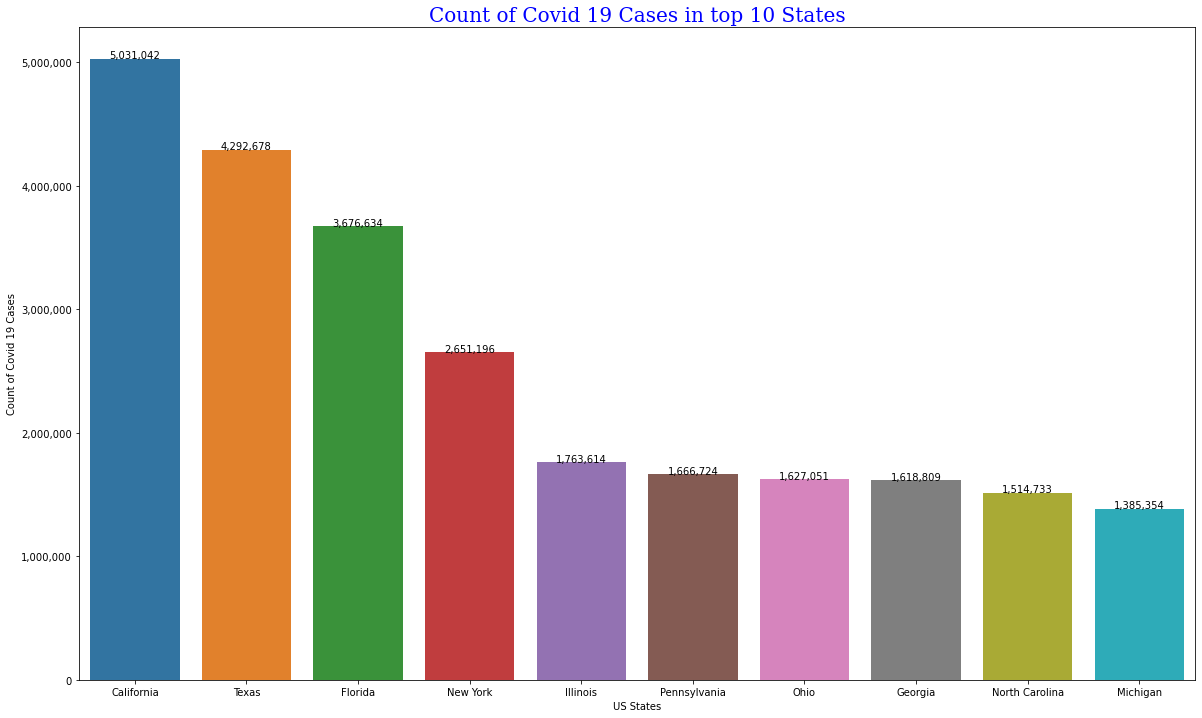

In [145]:
stCount10 = smry.head(10)
# Count of Covid 19 Cases in top 10 States

plt.figure(figsize=(20, 12))
p= sns.barplot(x='State', y='cases',data=stCount10)
show_values_on_bars(p)

font1 = {'family':'serif','color':'blue','size':20}

plt.title("Count of Covid 19 Cases in top 10 States", fontdict = font1)
plt.xlabel("US States")
plt.ylabel("Count of Covid 19 Cases")

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


Text(0, 0.5, 'Count of Covid 19 Deaths')

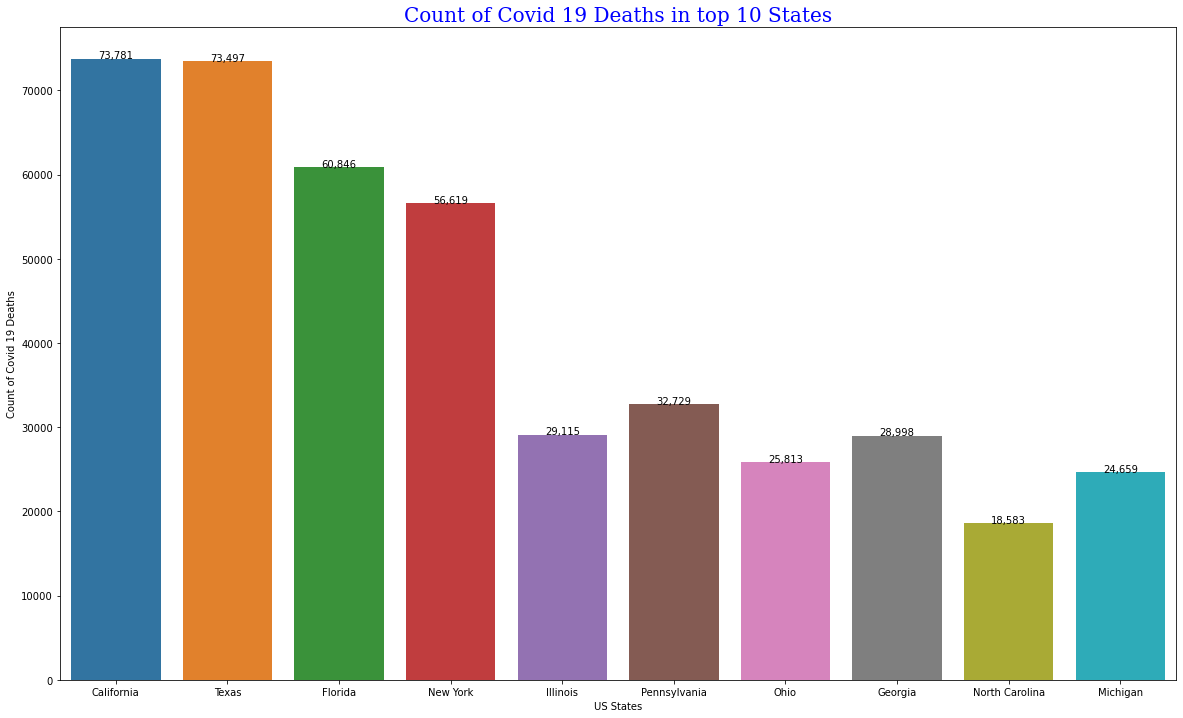

In [146]:
# Count of Covid 19 Deaths in top 10 States

plt.figure(figsize=(20, 12))
p = sns.barplot(x='State', y='deaths',data=stCount10)
show_values_on_bars(p)

font1 = {'family':'serif','color':'blue','size':20}

plt.title("Count of Covid 19 Deaths in top 10 States", fontdict = font1)
plt.xlabel("US States")
plt.ylabel("Count of Covid 19 Deaths")

Text(0, 0.5, 'Death Rate of Covid 19')

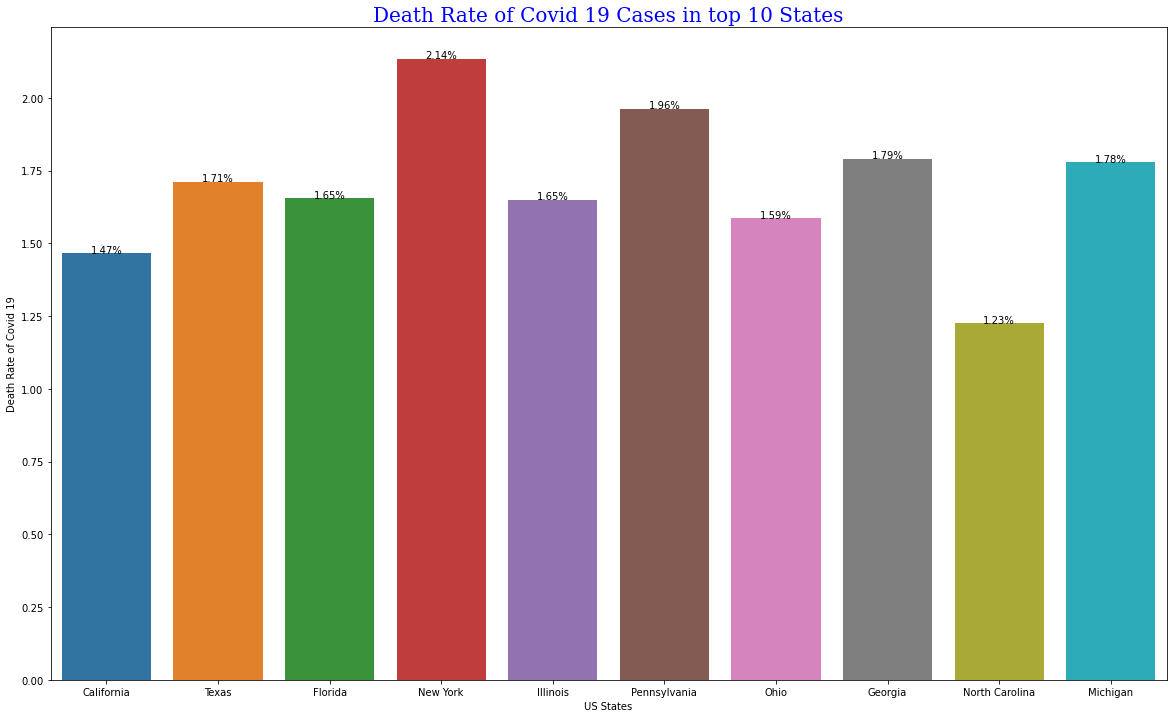

In [147]:
# Death Rate of Covid 19 Cases in top 10 States

plt.figure(figsize=(20, 12))
p = sns.barplot(x='State', y='deathRate',data=stCount10)
show_values_on_bars2(p)

font1 = {'family':'serif','color':'blue','size':20}

plt.title("Death Rate of Covid 19 Cases in top 10 States", fontdict = font1)
plt.xlabel("US States")
plt.ylabel("Death Rate of Covid 19")

In [148]:
# average of death rates in top 10 states
print('Average Death Rate in top 10 States:', '{:.2f}%'.format(stCount10['deathRate'].mean()))
print('Overall Death Rate in US           :', '{:.2f}%'.format(smry['deathRate'].mean()))

Average Death Rate in top 10 States: 1.70%
Overall Death Rate in US           : 1.45%


In [149]:
smry.sort_values(by=['deathRate'], ascending=False, inplace=True)
# 10 sates with highest death rate
smry.head(10)

,cases,deaths,deathRate,State
12,1225928,28230.0,2.302745,New Jersey
18,887889,19244.0,2.167388,Massachusetts
33,412058,8834.0,2.143873,Connecticut
3,2651196,56619.0,2.135602,New York
29,510322,10222.0,2.003049,Mississippi
5,1666724,32729.0,1.963672,Pennsylvania
27,575147,11096.0,1.929246,Maryland
23,766849,14735.0,1.921500,Louisiana
20,841483,16043.0,1.906515,Alabama
50,65889,1196.0,1.815174,District of Columbia


In [150]:
# 10 sates with lowest death rate
smry.tail(10)

,cases,deaths,deathRate,State
44,149827,1656.0,1.105275,New Hampshire
47,114065,1254.0,1.099373,Maine
19,866179,9249.0,1.067793,Minnesota
15,941776,9800.0,1.040587,Wisconsin
36,300348,2807.0,0.934583,Nebraska
51,45985,401.0,0.872023,Vermont
54,431,3.0,0.696056,Northern Mariana Islands
26,581288,3411.0,0.586800,Utah
46,146600,822.0,0.560709,Alaska
55,1,0.0,0.000000,American Samoa


In [151]:
# Covid Case increase over the last 20 months

mnDate = ['2021-11-17','2021-10-31','2021-09-30','2021-08-31','2021-07-31','2021-06-30','2021-05-31','2021-04-30','2021-03-31',
        '2021-02-28','2021-01-31','2020-12-31','2020-11-30','2020-10-31','2020-09-30','2020-08-31','2020-07-31',
         '2020-06-30','2020-05-31','2020-04-30','2020-03-31']

mnDate

covid20mn = df1[df1['date'].isin(mnDate)]

covid20mn['date'].value_counts()


2021-11-17    3250
2021-10-31    3249
2021-09-30    3249
2021-08-31    3248
2021-07-31    3248
2021-03-31    3247
2021-04-30    3247
2021-01-31    3247
2021-02-28    3246
2020-11-30    3245
2020-12-31    3245
2021-05-31    3245
2021-06-30    3245
2020-10-31    3244
2020-09-30    3240
2020-08-31    3233
2020-07-31    3217
2020-06-30    3150
2020-05-31    3070
2020-04-30    2855
2020-03-31    2153
Name: date, dtype: int64

In [152]:
case1  = pd.DataFrame(covid20mn.groupby(['date'])['cases'].agg('sum'))
death1 = pd.DataFrame(covid20mn.groupby(['date'])['deaths'].agg('sum'))

smry1= case1.merge(death1, on='date', how='left')


smry1['deathRate'] = (smry1['deaths'] / smry1['cases'])*100
smry1.sort_values(by=['cases'], ascending=False, inplace=True)

smry1['Date'] = smry1.index
smry1


,cases,deaths,deathRate,Date
date,,,,
2021-11-17,47390257,766206.0,1.616801,2021-11-17
2021-10-31,45934095,745535.0,1.623054,2021-10-31
2021-09-30,43458032,697988.0,1.606120,2021-09-30
2021-08-31,39316629,640519.0,1.629130,2021-08-31
2021-07-31,35018564,612919.0,1.750269,2021-07-31
2021-06-30,33639764,604460.0,1.796862,2021-06-30
2021-05-31,33277912,594321.0,1.785932,2021-05-31
2021-04-30,32362374,575640.0,1.778732,2021-04-30
2021-03-31,30478886,551661.0,1.809978,2021-03-31


[Text(0, 0, '0'),
 Text(0, 0, '10,000,000'),
 Text(0, 0, '20,000,000'),
 Text(0, 0, '30,000,000'),
 Text(0, 0, '40,000,000'),
 Text(0, 0, '50,000,000')]

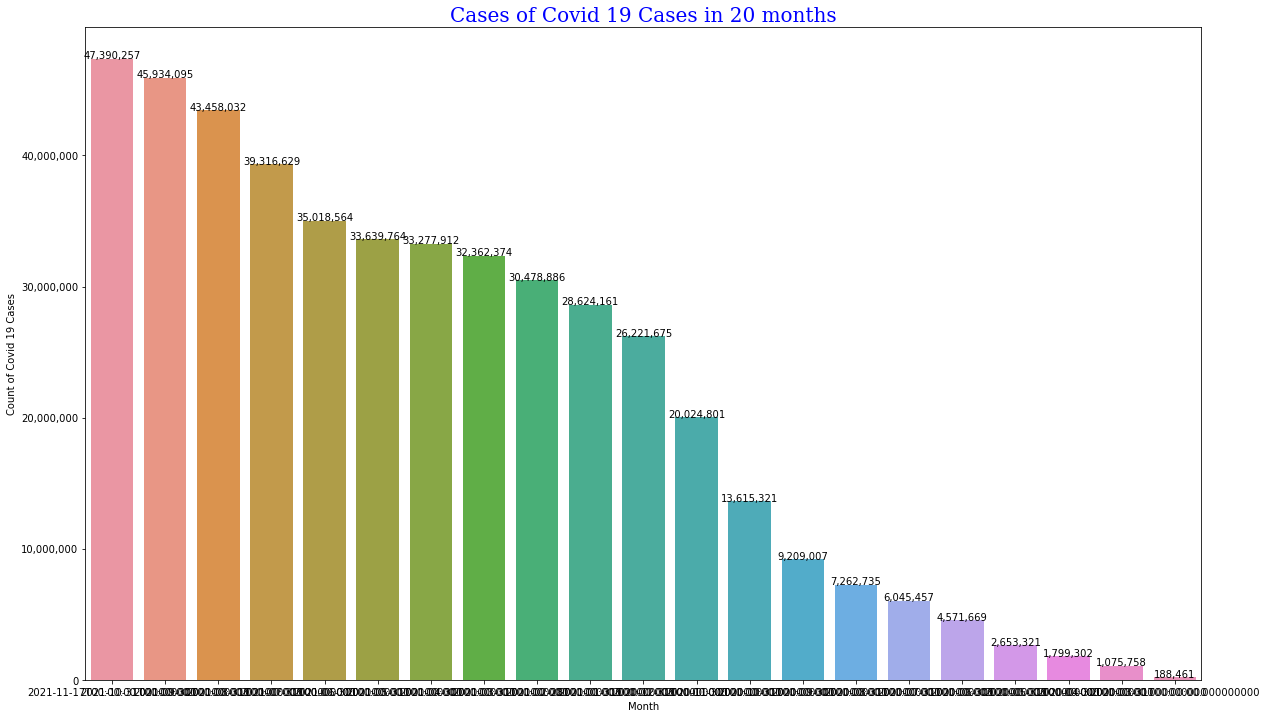

In [153]:
# Cases of Covid 19 Cases in 20 months

plt.figure(figsize=(20, 12))
p =sns.barplot(x='Date', y='cases',data=smry1)

show_values_on_bars(p)

font1 = {'family':'serif','color':'blue','size':20}

plt.title("Cases of Covid 19 Cases in 20 months", fontdict = font1)
plt.xlabel("Month")
plt.ylabel("Count of Covid 19 Cases")

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


Text(0, 0.5, 'Count of Covid 19 Deaths')

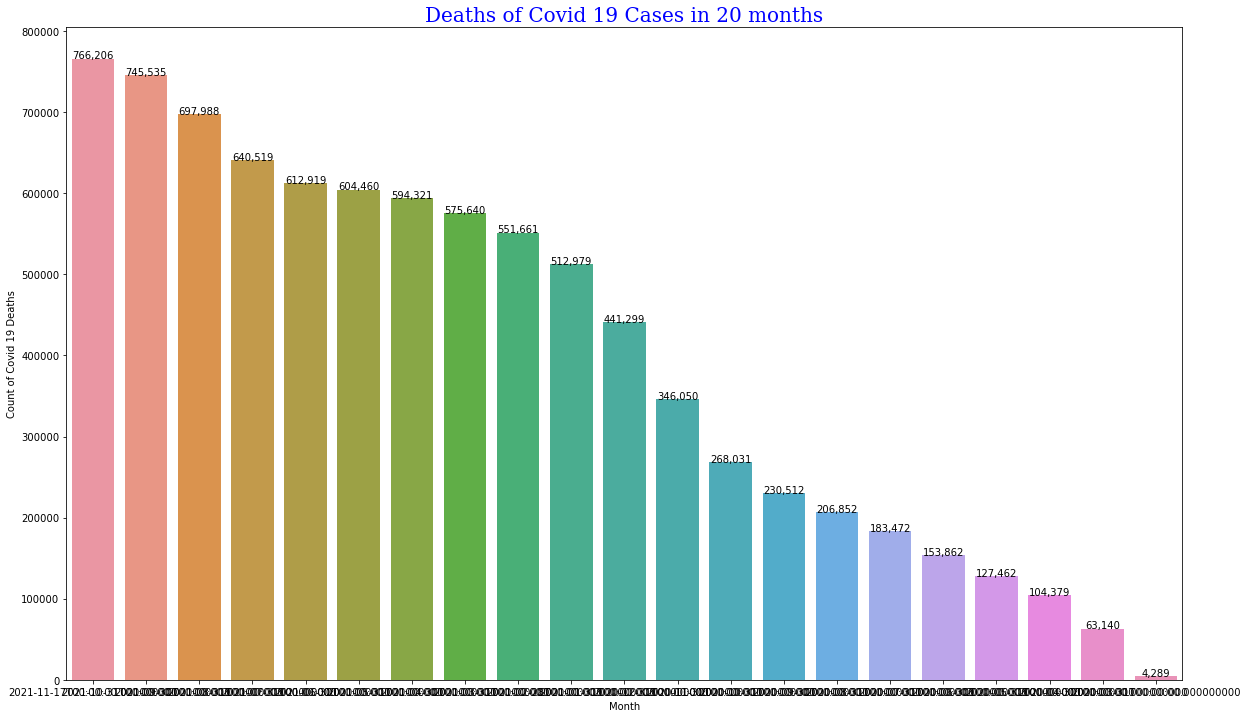

In [154]:
# Deaths of Covid 19 Cases in 20 months

plt.figure(figsize=(20, 12))
p= sns.barplot(x='Date', y='deaths',data=smry1)
show_values_on_bars(p)

font1 = {'family':'serif','color':'blue','size':20}

plt.title("Deaths of Covid 19 Cases in 20 months", fontdict = font1)
plt.xlabel("Month")
plt.ylabel("Count of Covid 19 Deaths")

In [155]:
# Maryland data
mdCovs = covid20mn.loc[covid20mn['state'] == 'Maryland']
mdCovs

,date,county,state,fips,cases,deaths
22582,2020-03-31,Anne Arundel,Maryland,24003.0,127,1.0
22583,2020-03-31,Baltimore,Maryland,24005.0,227,1.0
22584,2020-03-31,Baltimore city,Maryland,24510.0,187,2.0
22585,2020-03-31,Calvert,Maryland,24009.0,15,0.0
22586,2020-03-31,Caroline,Maryland,24011.0,4,0.0
...,...,...,...,...,...,...
1925066,2021-11-17,Talbot,Maryland,24041.0,2987,56.0
1925067,2021-11-17,Unknown,Maryland,NaN,0,46.0
1925068,2021-11-17,Washington,Maryland,24043.0,20709,419.0
1925069,2021-11-17,Wicomico,Maryland,24045.0,11429,230.0


Text(0, 0.5, 'Count of Covid 19 Cases')

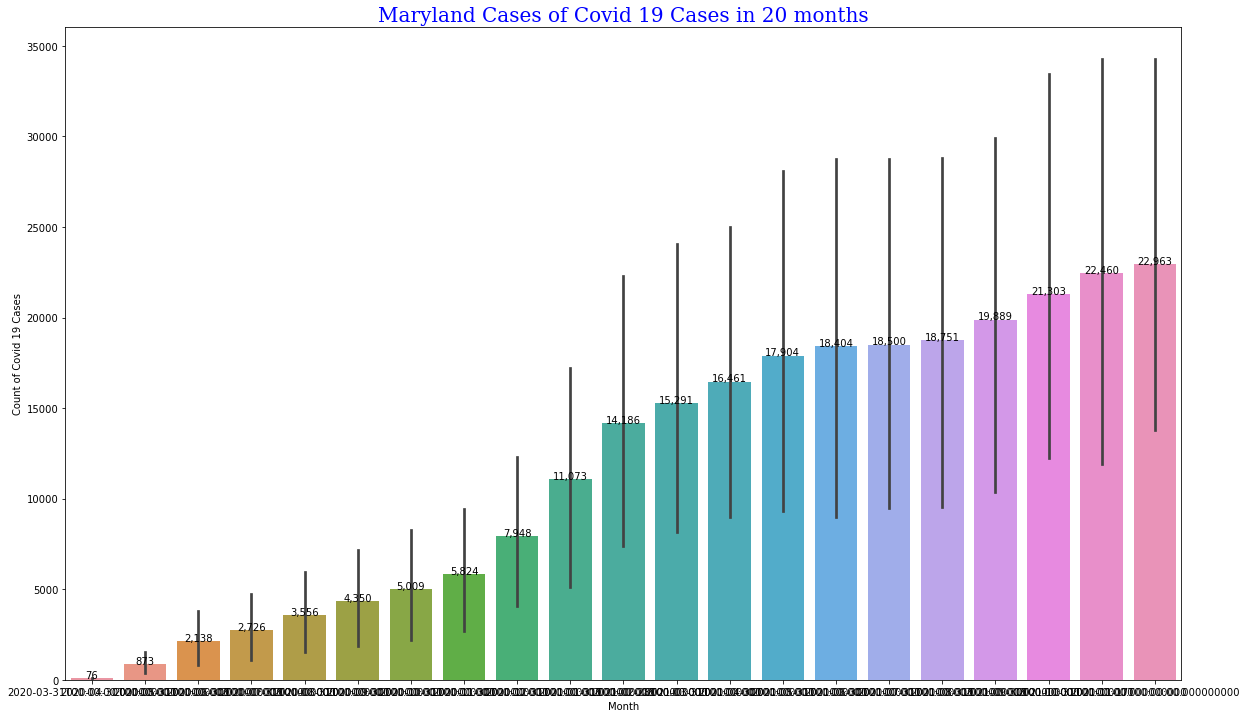

In [156]:
# Cases of Covid 19 Cases in 20 months

plt.figure(figsize=(20, 12))
p=sns.barplot(x='date', y='cases',data=mdCovs)
show_values_on_bars(p)

font1 = {'family':'serif','color':'blue','size':20}

plt.title("Maryland Cases of Covid 19 Cases in 20 months", fontdict = font1)
plt.xlabel("Month")
plt.ylabel("Count of Covid 19 Cases")

In [157]:
mdCovs1 = mdCovs.loc[mdCovs['date'] == mdCovs['date'].max()]
mdCovs1.sort_values(by=['cases'], ascending=False, inplace=True)
mdCovs1

,date,county,state,fips,cases,deaths
1925062,2021-11-17,Prince George's,Maryland,24033.0,101063,1739.0
1925061,2021-11-17,Montgomery,Maryland,24031.0,83919,1728.0
1925048,2021-11-17,Baltimore,Maryland,24005.0,78621,1879.0
1925049,2021-11-17,Baltimore city,Maryland,24510.0,63051,1369.0
1925047,2021-11-17,Anne Arundel,Maryland,24003.0,54341,782.0
1925056,2021-11-17,Frederick,Maryland,24021.0,25122,388.0
1925059,2021-11-17,Howard,Maryland,24027.0,23183,282.0
1925058,2021-11-17,Harford,Maryland,24025.0,21485,362.0
1925068,2021-11-17,Washington,Maryland,24043.0,20709,419.0
1925054,2021-11-17,Charles,Maryland,24017.0,14747,264.0


In [158]:
# load Maryland population data
mdPop=pd.read_csv('csvData.csv')

mdPop['county'] = mdPop['CTYNAME'].str.replace('County','')
mdPop.drop(['CTYNAME'], axis=1, inplace=True)

mdPop.head()


,pop2021,GrowthRate,popDensity,county
0,1055110,8.1496,2543.1341,Montgomery
1,908743,4.8849,2190.3454,Prince George's
2,826392,2.4466,1991.8546,Baltimore
3,586656,8.7842,1414.0183,Anne Arundel
4,575584,-7.3007,1387.3315,Baltimore City


In [159]:
mdCovs1['county'] = mdCovs1['county'].str.upper()
mdCovs1.sort_values(by=['county'], ascending=True, inplace=True)

mdCovs1.reset_index(drop=True, inplace=True)
mdCovs1

,date,county,state,fips,cases,deaths
0,2021-11-17,ALLEGANY,Maryland,24001.0,10161,260.0
1,2021-11-17,ANNE ARUNDEL,Maryland,24003.0,54341,782.0
2,2021-11-17,BALTIMORE,Maryland,24005.0,78621,1879.0
3,2021-11-17,BALTIMORE CITY,Maryland,24510.0,63051,1369.0
4,2021-11-17,CALVERT,Maryland,24009.0,5883,101.0
5,2021-11-17,CAROLINE,Maryland,24011.0,3342,52.0
6,2021-11-17,CARROLL,Maryland,24013.0,12332,294.0
7,2021-11-17,CECIL,Maryland,24015.0,9155,185.0
8,2021-11-17,CHARLES,Maryland,24017.0,14747,264.0
9,2021-11-17,DORCHESTER,Maryland,24019.0,4281,84.0


In [160]:
mdPop['county'] = mdPop['county'].str.upper()
mdPop.sort_values(by=['county'], ascending=True, inplace=True)

mdPop.reset_index(drop=True, inplace=True)
mdPop.head()

,pop2021,GrowthRate,popDensity,county
0,69366,-7.4688,167.1930,ALLEGANY
1,586656,8.7842,1414.0183,ANNE ARUNDEL
2,826392,2.4466,1991.8546,BALTIMORE
3,575584,-7.3007,1387.3315,BALTIMORE CITY
4,93445,5.0085,225.2307,CALVERT


In [161]:
mdCovPop= mdCovs1.merge(mdPop, how='outer', left_index=True, right_index=True)

mdCovPop.sort_values(by=['cases'], ascending=False, inplace=True)

mdCovPop['CovidPercent'] = mdCovPop['cases']  / mdCovPop['pop2021']  

mdCovPop.head()


,date,county_x,state,fips,cases,deaths,pop2021,GrowthRate,popDensity,county_y,CovidPercent
16,2021-11-17,PRINCE GEORGE'S,Maryland,24033.0,101063,1739.0,908743.0,4.8849,2190.3454,PRINCE GEORGE'S,0.111212
15,2021-11-17,MONTGOMERY,Maryland,24031.0,83919,1728.0,1055110.0,8.1496,2543.1341,MONTGOMERY,0.079536
2,2021-11-17,BALTIMORE,Maryland,24005.0,78621,1879.0,826392.0,2.4466,1991.8546,BALTIMORE,0.095138
3,2021-11-17,BALTIMORE CITY,Maryland,24510.0,63051,1369.0,575584.0,-7.3007,1387.3315,BALTIMORE CITY,0.109543
1,2021-11-17,ANNE ARUNDEL,Maryland,24003.0,54341,782.0,586656.0,8.7842,1414.0183,ANNE ARUNDEL,0.092628


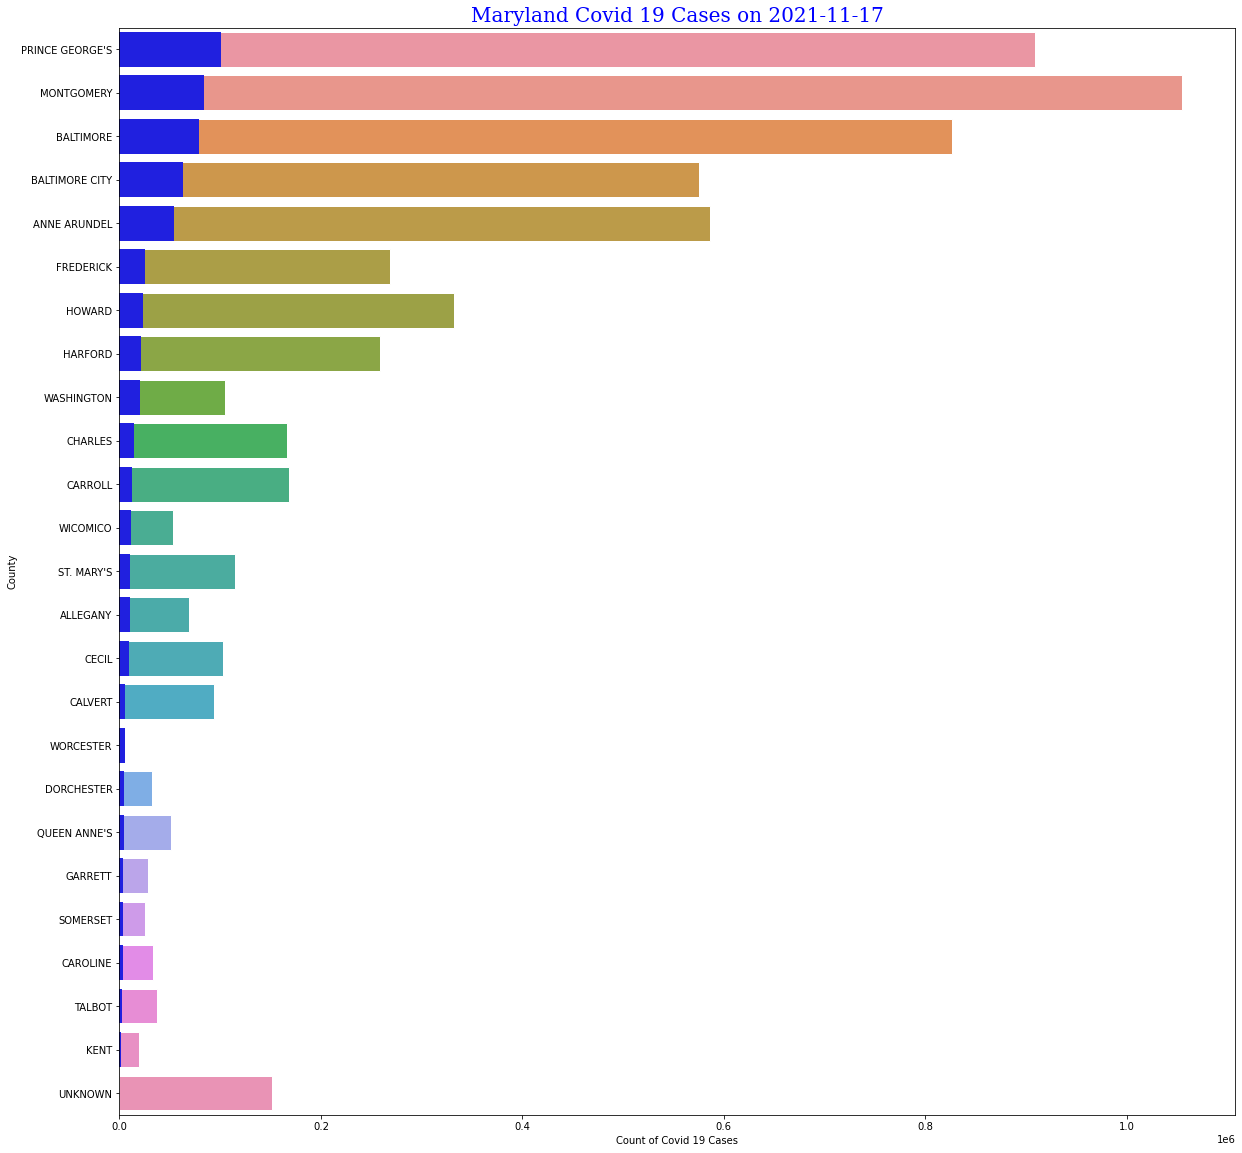

In [162]:
# Maryland Covid 19 Cases on latest date

plt.figure(figsize=(20, 20))
sns.barplot(x='pop2021', y='county_x',data=mdCovPop, label = 'Population', edgecolor = 'w')
sns.barplot(x='cases', y='county_x',data=mdCovPop, label = 'Covid Cases', color = 'blue')

font1 = {'family':'serif','color':'blue','size':20}

text = "Maryland Covid 19 Cases on " + mdCovPop['date'].max().strftime("%Y-%m-%d")

plt.title(text, fontdict = font1)
plt.xlabel("Count of Covid 19 Cases")
plt.ylabel("County")

# f, ax = plt.subplots()

# ax.legend(ncol = 2, loc = 'lower right')

# sns.despine(left = True, bottom = True)
plt.show()

posx and posy should be finite values
posx and posy should be finite values


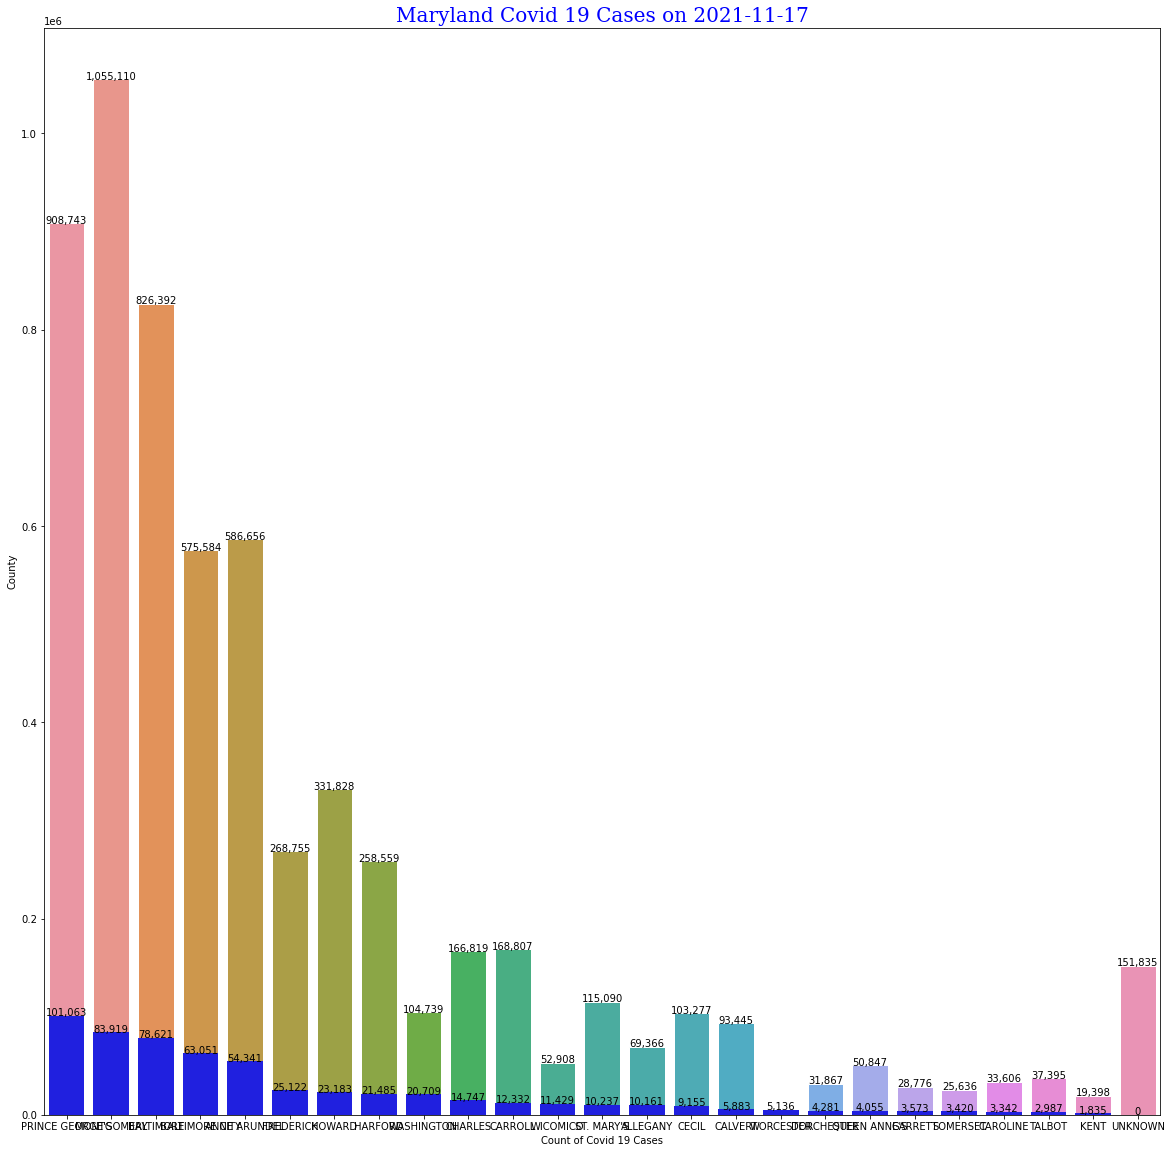

In [163]:
# Maryland Covid 19 Cases on 2021-11-17

plt.figure(figsize=(20, 20))
p=sns.barplot(y='pop2021', x='county_x',data=mdCovPop, label = 'Population', edgecolor = 'w')
sns.barplot(y='cases', x='county_x',data=mdCovPop, label = 'Covid Cases', color = 'blue')
show_values_on_bars(p)
font1 = {'family':'serif','color':'blue','size':20}

text = "Maryland Covid 19 Cases on " + mdCovPop['date'].max().strftime("%Y-%m-%d")

plt.title(text, fontdict = font1)
plt.xlabel("Count of Covid 19 Cases")
plt.ylabel("County")


# f, ax = plt.subplots()

# ax.legend(ncol = 2, loc = 'lower right')

# sns.despine(left = True, bottom = True)
plt.show()

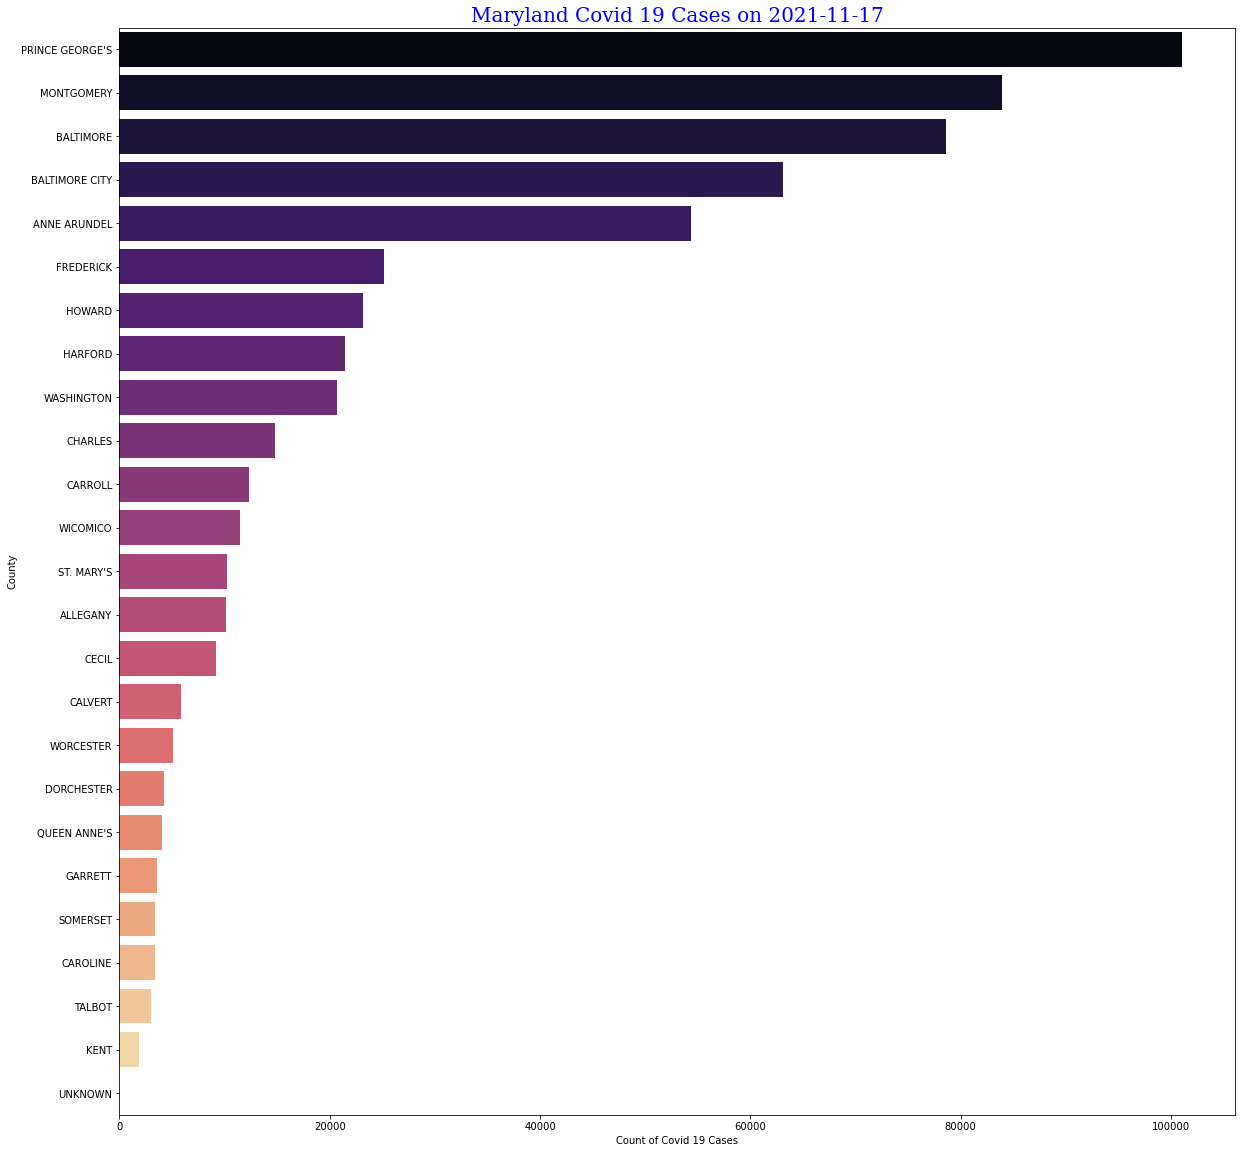

In [164]:
# Maryland Covid 19 Cases on latest date

plt.figure(figsize=(20, 20))
sns.barplot(x='cases', y='county_x',data=mdCovPop, label = 'Covid Cases', palette = 'magma')

font1 = {'family':'serif','color':'blue','size':20}

text = "Maryland Covid 19 Cases on " + mdCovPop['date'].max().strftime("%Y-%m-%d")

plt.title(text, fontdict = font1)
plt.xlabel("Count of Covid 19 Cases")
plt.ylabel("County")

plt.show()

In [165]:
# Load other county level data (Maryland only)

# load Maryland population data
mdDemo=pd.read_csv('County_Demographics.csv')

mdDemo = mdDemo[mdDemo['State'] == 'MD']

mdDemo['county'] = mdDemo['County'].str.upper()
mdDemo.sort_values(by=['county'], ascending=True, inplace=True)

mdDemo.reset_index(drop=True, inplace=True)

#mdDemo['county'] = mdDemo['CTYNAME'].str.replace('County','')
mdDemo.drop(['County','State','FIPS'], axis=1, inplace=True)

mdDemo.head(10)

,PovertyPct,county
0,0.160,ALLEGANY
1,0.058,ANNE ARUNDEL
2,0.089,BALTIMORE
3,0.204,BALTIMORE CITY
4,0.057,CALVERT
5,0.121,CAROLINE
6,0.051,CARROLL
7,0.103,CECIL
8,0.064,CHARLES
9,0.164,DORCHESTER


In [166]:
# load Maryland Unemployment data
mdUnemp=pd.read_csv('CountyUnemploymentReport.csv')

mdUnemp['county'] = mdUnemp['Name'].str.upper()
mdUnemp.sort_values(by=['county'], ascending=True, inplace=True)

mdUnemp.reset_index(drop=True, inplace=True)

mdUnemp['county'] = mdDemo['county'].str.replace(', MD','')
mdUnemp.drop(['Name'], axis=1, inplace=True)

mdUnemp.drop(15,axis=0,inplace=True)
#mdUnemp = mdUnemp[mdUnemp["FIPS"] != '24000' ]

mdUnemp.drop(['county'], axis=1, inplace=True)

mdUnemp.head(10)

,FIPS,Unemp2012,Unemp2013,Unemp2014,Unemp2015,Unemp2016,Unemp2017,Unemp2018,Unemp2019,Unemp2020,Median Household Income (2019),% of State Median HH Income
0,24001,8.8,8.4,7.5,6.8,6.0,5.7,5.3,5.1,7.8,"$48,170",55.60%
1,24003,5.9,5.6,5.0,4.3,3.7,3.5,3.2,3.0,5.8,"$100,916",116.50%
2,24510,10.0,9.6,8.4,7.4,6.4,6.1,5.6,5.0,8.8,"$49,780",57.50%
3,24005,7.2,6.8,6.0,5.2,4.5,4.3,3.9,3.6,6.8,"$76,972",88.80%
4,24009,6.2,5.9,5.2,4.5,3.7,3.6,3.4,3.1,5.2,"$111,056",128.20%
5,24011,7.6,6.9,6.2,5.4,4.6,4.2,3.7,3.5,5.5,"$60,143",69.40%
6,24013,5.8,5.4,4.7,4.1,3.5,3.3,3.1,2.8,5.1,"$101,810",117.50%
7,24015,8.2,7.6,6.5,5.9,5.0,4.7,4.3,3.9,5.9,"$75,307",86.90%
8,24017,6.6,6.4,5.7,4.9,4.1,3.9,3.7,3.5,6.7,"$102,510",118.30%
9,24019,10.7,9.7,8.3,7.0,6.0,5.6,5.0,4.5,6.7,"$48,709",56.20%


In [167]:
# load Maryland education data
mdedu=pd.read_csv('CounryEducationReport.csv')

mdedu['county'] = mdedu['Name'].str.upper()
mdedu.sort_values(by=['county'], ascending=True, inplace=True)

mdedu.reset_index(drop=True, inplace=True)

mdedu['county'] = mdedu['county'].str.replace(', MD','')
mdedu.drop(['Name','FIPS'], axis=1, inplace=True)

mdedu.head(10)

,2013 Rural-urban Continuum Code*,Edu1970,Edu1980,Edu1990,Edu2000,Edu2015-2019,county
0,3.0,6.70%,9.30%,11.80%,14.10%,18.90%,ALLEGANY
1,1.0,12.60%,19.00%,24.60%,30.60%,41.70%,ANNE ARUNDEL
2,1.0,7.20%,11.30%,15.50%,19.10%,31.90%,BALTIMORE
3,1.0,12.70%,18.80%,25.00%,30.60%,39.40%,BALTIMORE
4,1.0,6.80%,11.80%,17.60%,22.50%,32.40%,CALVERT
5,6.0,5.50%,9.10%,10.80%,12.10%,18.40%,CAROLINE
6,1.0,6.70%,14.30%,19.60%,24.80%,36.40%,CARROLL
7,1.0,6.10%,11.00%,12.10%,16.40%,23.90%,CECIL
8,1.0,6.70%,12.40%,16.20%,20.00%,28.90%,CHARLES
9,6.0,4.80%,8.20%,10.90%,12.00%,21.20%,DORCHESTER


In [168]:
# load Maryland Medicaid data
mdMedicaid=pd.read_csv('DASH County & Dual Demo.csv')


mdMedicaid = mdMedicaid[mdMedicaid['State'] == 'MD']

mdMedicaid['county'] = mdMedicaid['County'].str.upper()
mdMedicaid.sort_values(by=['county'], ascending=True, inplace=True)

mdMedicaid.reset_index(drop=True, inplace=True)

#mdDemo['county'] = mdDemo['CTYNAME'].str.replace('County','')
mdMedicaid.drop(['County','county','State'], axis=1, inplace=True)

# Average Beneficiary CMS Hierarchical Condition Category (HCC) Risk Scores
# Risk scores generally range between 0.9 and 1.7, and beneficiaries with risk scores less than 1.0 are considered 
# relatively healthy.

mdMedicaid.head(10)

,State and County FIPS Code,Percent Eligible for Medicaid,Average HCC Score
0,24001,23.22 %,1.02
1,24003,11.05 %,0.93
2,24005,15.99 %,1.00
3,24510,36.03 %,1.21
4,24009,11.93 %,0.97
5,24011,21.85 %,1.00
6,24013,10.96 %,0.91
7,24015,16.77 %,0.98
8,24017,15.48 %,1.03
9,24019,23.81 %,1.03


In [169]:
# compile the list of dataframes to be merged

mdCovPop.drop(['county_x','county_y'], axis=1, inplace=True)

mdCovPop.head(10)


,date,state,fips,cases,deaths,pop2021,GrowthRate,popDensity,CovidPercent
16,2021-11-17,Maryland,24033.0,101063,1739.0,908743.0,4.8849,2190.3454,0.111212
15,2021-11-17,Maryland,24031.0,83919,1728.0,1055110.0,8.1496,2543.1341,0.079536
2,2021-11-17,Maryland,24005.0,78621,1879.0,826392.0,2.4466,1991.8546,0.095138
3,2021-11-17,Maryland,24510.0,63051,1369.0,575584.0,-7.3007,1387.3315,0.109543
1,2021-11-17,Maryland,24003.0,54341,782.0,586656.0,8.7842,1414.0183,0.092628
10,2021-11-17,Maryland,24021.0,25122,388.0,268755.0,14.7457,647.7808,0.093475
13,2021-11-17,Maryland,24027.0,23183,282.0,331828.0,14.9678,799.8058,0.069865
12,2021-11-17,Maryland,24025.0,21485,362.0,258559.0,5.4323,623.2054,0.083095
22,2021-11-17,Maryland,24043.0,20709,419.0,104739.0,5.8269,252.4527,0.197720
8,2021-11-17,Maryland,24017.0,14747,264.0,166819.0,13.3597,402.0842,0.088401


In [170]:
from functools import reduce

data_frames = [mdCovPop, mdDemo, mdUnemp, mdedu, mdMedicaid]

df_merged = reduce(lambda left,right: pd.merge(left,right, left_index=True, right_index=True, how='outer'), data_frames)

df_merged = df_merged[df_merged.cases != 0]

df_merged['deathRate'] = (df_merged['deaths'] / df_merged['cases'])*100
df_merged.head(10)

,date,state,fips,cases,deaths,pop2021,GrowthRate,popDensity,CovidPercent,PovertyPct,...,Edu1970,Edu1980,Edu1990,Edu2000,Edu2015-2019,county_y,State and County FIPS Code,Percent Eligible for Medicaid,Average HCC Score,deathRate
0,2021-11-17,Maryland,24001.0,10161,260.0,69366.0,-7.4688,167.1930,0.146484,0.160,...,6.70%,9.30%,11.80%,14.10%,18.90%,ALLEGANY,24001.0,23.22 %,1.02,2.558803
1,2021-11-17,Maryland,24003.0,54341,782.0,586656.0,8.7842,1414.0183,0.092628,0.058,...,12.60%,19.00%,24.60%,30.60%,41.70%,ANNE ARUNDEL,24003.0,11.05 %,0.93,1.439061
2,2021-11-17,Maryland,24005.0,78621,1879.0,826392.0,2.4466,1991.8546,0.095138,0.089,...,7.20%,11.30%,15.50%,19.10%,31.90%,BALTIMORE,24005.0,15.99 %,1.00,2.389947
3,2021-11-17,Maryland,24510.0,63051,1369.0,575584.0,-7.3007,1387.3315,0.109543,0.204,...,12.70%,18.80%,25.00%,30.60%,39.40%,BALTIMORE,24510.0,36.03 %,1.21,2.171258
4,2021-11-17,Maryland,24009.0,5883,101.0,93445.0,5.0085,225.2307,0.062957,0.057,...,6.80%,11.80%,17.60%,22.50%,32.40%,CALVERT,24009.0,11.93 %,0.97,1.716811
5,2021-11-17,Maryland,24011.0,3342,52.0,33606.0,1.6761,81.0006,0.099447,0.121,...,5.50%,9.10%,10.80%,12.10%,18.40%,CAROLINE,24011.0,21.85 %,1.00,1.555955
6,2021-11-17,Maryland,24013.0,12332,294.0,168807.0,0.9533,406.8759,0.073054,0.051,...,6.70%,14.30%,19.60%,24.80%,36.40%,CARROLL,24013.0,10.96 %,0.91,2.384042
7,2021-11-17,Maryland,24015.0,9155,185.0,103277.0,2.0877,248.9288,0.088645,0.103,...,6.10%,11.00%,12.10%,16.40%,23.90%,CECIL,24015.0,16.77 %,0.98,2.020754
8,2021-11-17,Maryland,24017.0,14747,264.0,166819.0,13.3597,402.0842,0.088401,0.064,...,6.70%,12.40%,16.20%,20.00%,28.90%,CHARLES,24017.0,15.48 %,1.03,1.790195
9,2021-11-17,Maryland,24019.0,4281,84.0,31867.0,-2.5116,76.8091,0.134340,0.164,...,4.80%,8.20%,10.90%,12.00%,21.20%,DORCHESTER,24019.0,23.81 %,1.03,1.962158


In [171]:
mdSub = df_merged[['date','county_x','Percent Eligible for Medicaid','cases','deaths','deathRate','PovertyPct',
                  'Median Household Income (2019)','Unemp2020']].sort_values(by=['Median Household Income (2019)'], ascending=True)
# convert dollar value string to numeric
mdSub['MedianIncome'] = mdSub['Median Household Income (2019)'].str.replace('$','').str.replace(',','').astype(float)
mdSub.drop(columns=['Median Household Income (2019)'], inplace=True)
mdSub.sort_values(by=['MedianIncome'], ascending=False, inplace=True)

# str $123,458.99 to number

# create a list of our conditions
conditions = [
    (mdSub['MedianIncome'] <= 65000),
    (mdSub['MedianIncome'] > 65000) & (mdSub['MedianIncome'] <= 100000),
    (mdSub['MedianIncome'] > 100000) 
    ]
# create a list of the values we want to assign for each condition
values = ['Low', 'Medium', 'High']

mdSub['incomeGroup'] = np.select(conditions, values)
mdSub.dropna(inplace=True)

mdSub.columns = ['date', 'county', 'Percent Eligible for Medicaid',
                 'cases', 'deaths','deathRate','PovertyPct', 'Unemp2020', 'MedianIncome',
                 'incomeGroup']

mdSub.columns

Index(['date', 'county', 'Percent Eligible for Medicaid', 'cases', 'deaths',
       'deathRate', 'PovertyPct', 'Unemp2020', 'MedianIncome', 'incomeGroup'],
      dtype='object')

In [172]:
# Function for showing values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:,.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

Total Cases in Maryland: 485,012


[Text(0, 0, '0'),
 Text(0, 0, '20,000'),
 Text(0, 0, '40,000'),
 Text(0, 0, '60,000'),
 Text(0, 0, '80,000'),
 Text(0, 0, '100,000'),
 Text(0, 0, '120,000')]

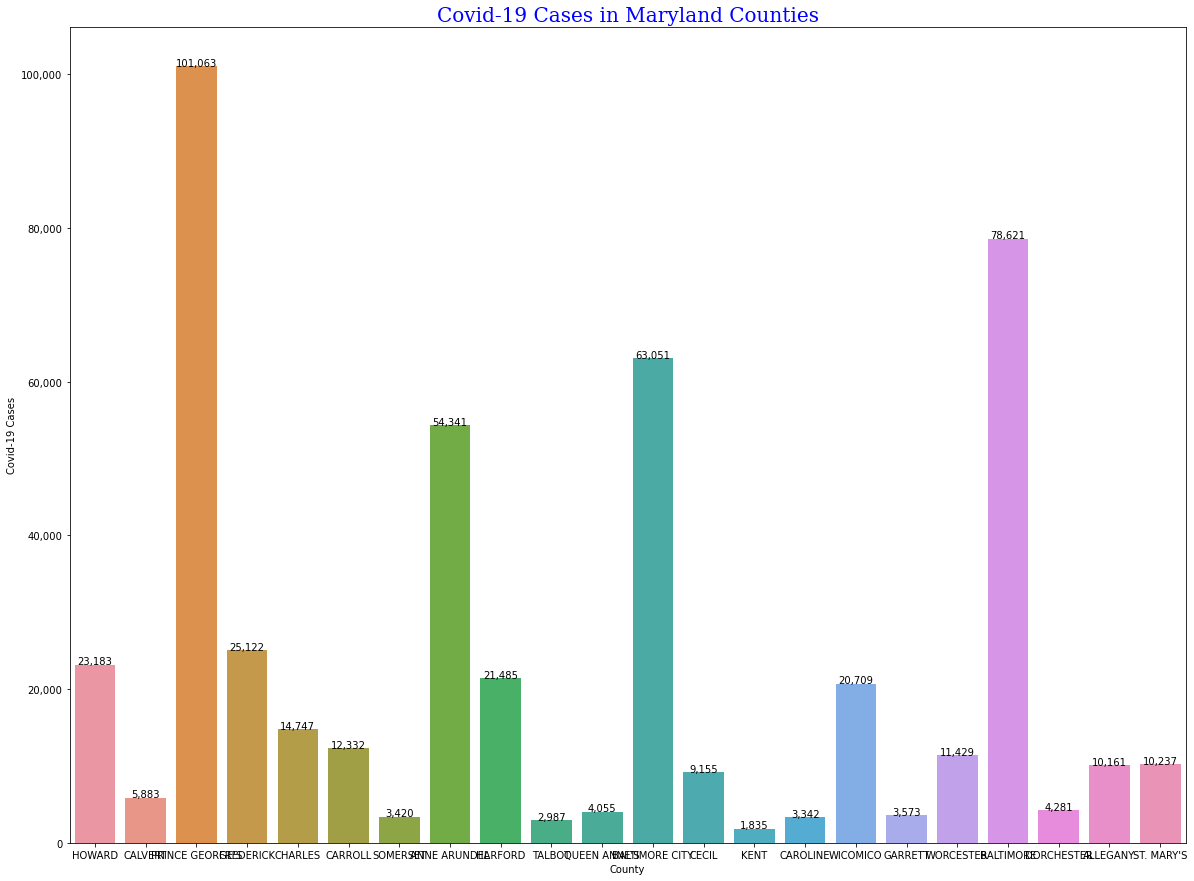

In [173]:
print('Total Cases in Maryland:', '{:,.0f}'.format(mdSub['cases'].sum()))

plt.figure(figsize=(20,15))

p= sns.barplot(data = mdSub ,x = 'county' ,y = 'cases',ci = None )
show_values_on_bars(p)

font1 = {'family':'serif','color':'blue','size':20}
plt.title("Covid-19 Cases in Maryland Counties", fontdict = font1)

plt.xlabel("County")
plt.ylabel("Covid-19 Cases")

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

Total Deaths in Maryland: 9,187


[Text(0, 0, '0'),
 Text(0, 0, '250'),
 Text(0, 0, '500'),
 Text(0, 0, '750'),
 Text(0, 0, '1,000'),
 Text(0, 0, '1,250'),
 Text(0, 0, '1,500'),
 Text(0, 0, '1,750'),
 Text(0, 0, '2,000')]

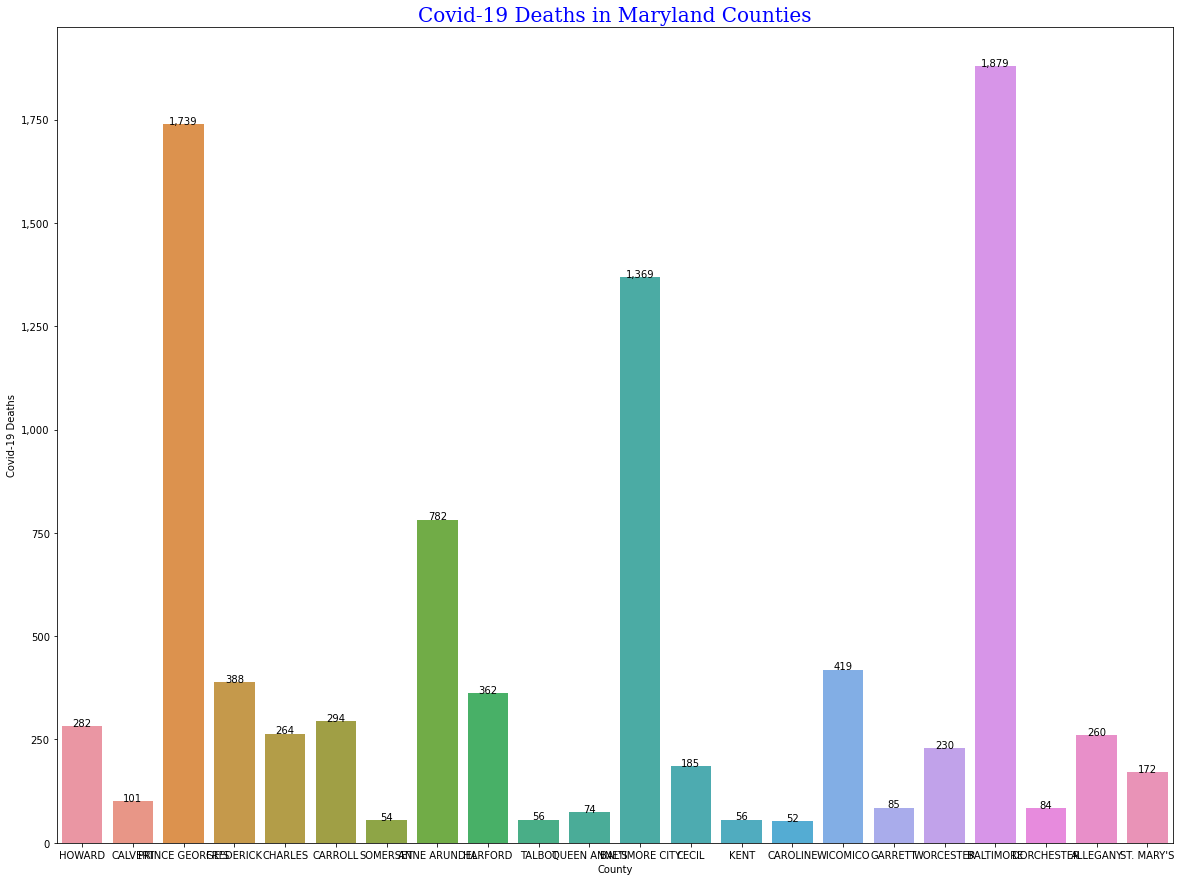

In [174]:
print('Total Deaths in Maryland:', '{:,.0f}'.format(mdSub['deaths'].sum()))

plt.figure(figsize=(20,15))

p= sns.barplot(data = mdSub ,x = 'county' ,y = 'deaths',ci = None )
show_values_on_bars(p)

font1 = {'family':'serif','color':'blue','size':20}
plt.title("Covid-19 Deaths in Maryland Counties", fontdict = font1)

plt.xlabel("County")
plt.ylabel("Covid-19 Deaths")

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

Total Cases in Maryland: 485,012


[Text(0, 0, '0'),
 Text(0, 0, '5,000'),
 Text(0, 0, '10,000'),
 Text(0, 0, '15,000'),
 Text(0, 0, '20,000'),
 Text(0, 0, '25,000'),
 Text(0, 0, '30,000'),
 Text(0, 0, '35,000')]

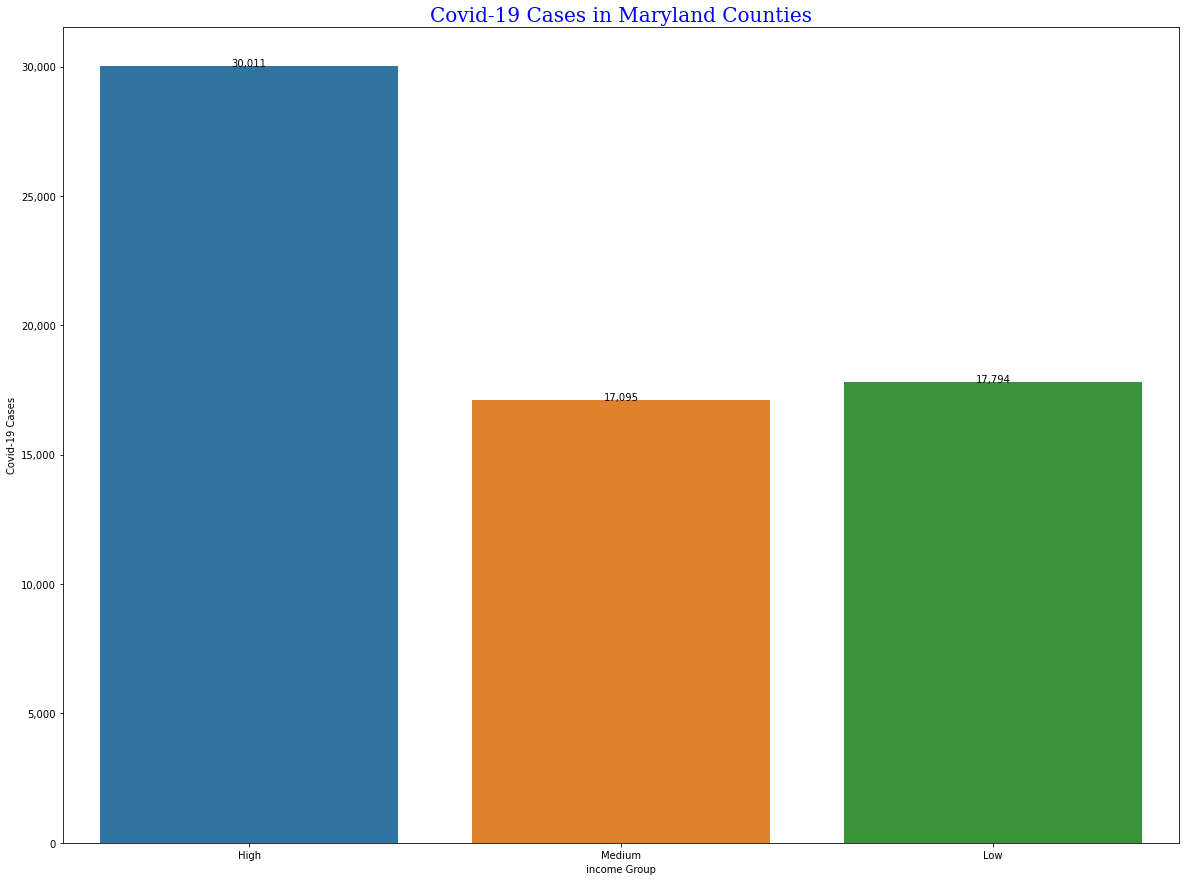

In [175]:
print('Total Cases in Maryland:', '{:,.0f}'.format(mdSub['cases'].sum()))

plt.figure(figsize=(20,15))

p= sns.barplot(data = mdSub ,x = 'incomeGroup' ,y = 'cases',ci = None )
show_values_on_bars(p)

font1 = {'family':'serif','color':'blue','size':20}
plt.title("Covid-19 Cases in Maryland Counties", fontdict = font1)

plt.xlabel("income Group")
plt.ylabel("Covid-19 Cases")

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

[Text(0, 0, '0.00%'),
 Text(0, 0, '0.50%'),
 Text(0, 0, '1.00%'),
 Text(0, 0, '1.50%'),
 Text(0, 0, '2.00%'),
 Text(0, 0, '2.50%'),
 Text(0, 0, '3.00%'),
 Text(0, 0, '3.50%')]

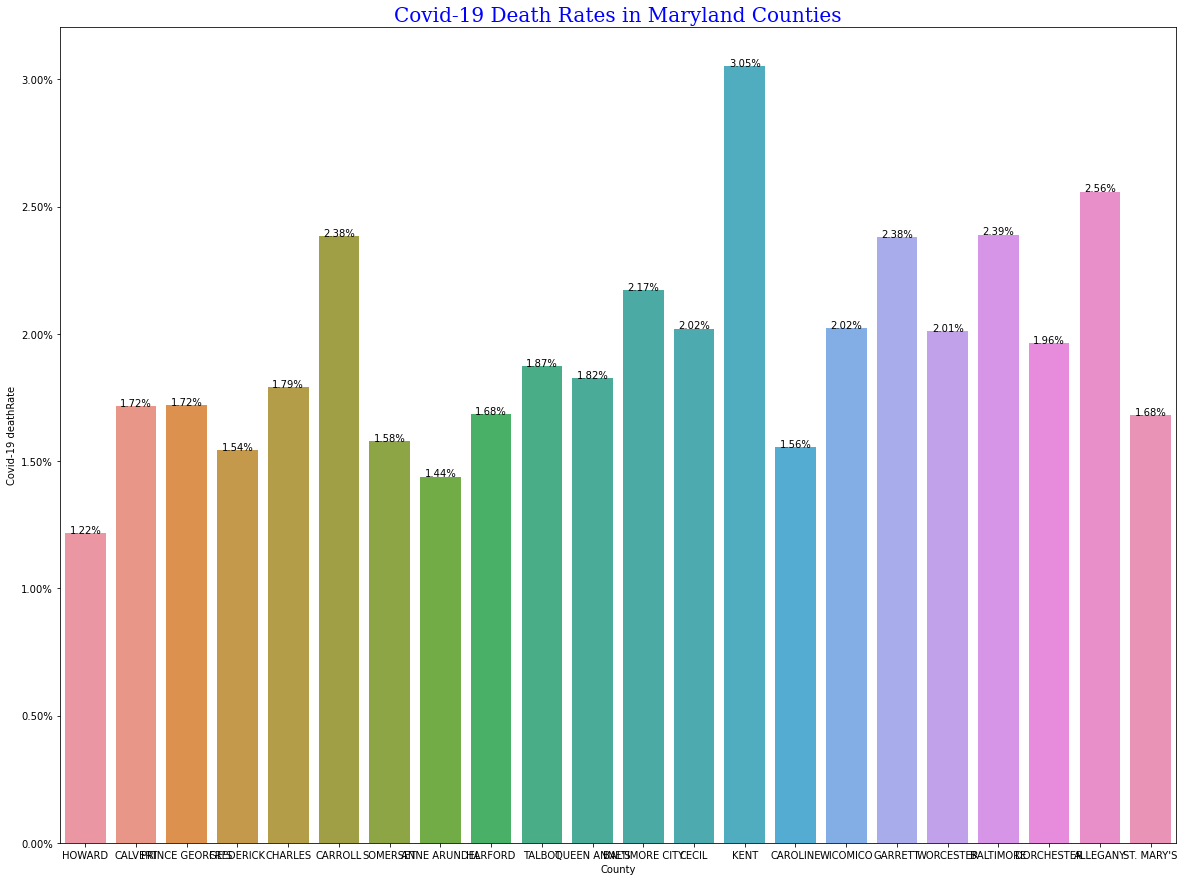

In [176]:
# Function for showing values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:,.2f}%'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


plt.figure(figsize=(20,15))

p= sns.barplot(data = mdSub ,x = 'county' ,y = 'deathRate',ci = None )
show_values_on_bars(p)

font1 = {'family':'serif','color':'blue','size':20}
plt.title("Covid-19 Death Rates in Maryland Counties", fontdict = font1)

plt.xlabel("County")
plt.ylabel("Covid-19 deathRate")

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.2f}%'.format(x) for x in current_values])

Average Death Rate in Maryland: 1.94


[Text(0, 0, '0%'),
 Text(0, 0, '0%'),
 Text(0, 0, '0%'),
 Text(0, 0, '1%'),
 Text(0, 0, '1%'),
 Text(0, 0, '1%'),
 Text(0, 0, '2%'),
 Text(0, 0, '2%'),
 Text(0, 0, '2%'),
 Text(0, 0, '2%')]

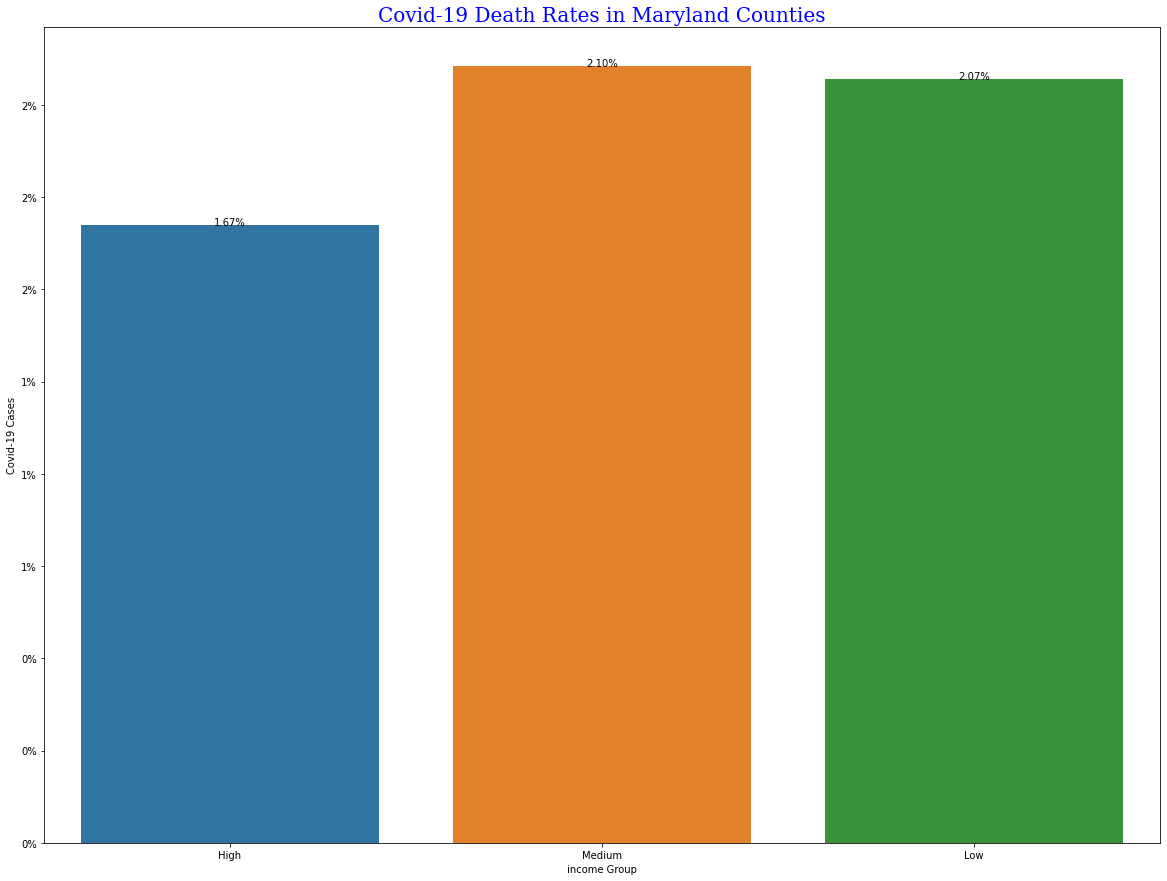

In [177]:
print('Average Death Rate in Maryland:', '{:,.2f}'.format(mdSub['deathRate'].mean()))

plt.figure(figsize=(20,15))

p= sns.barplot(data = mdSub ,x = 'incomeGroup' ,y = 'deathRate',ci = None )
show_values_on_bars(p)

font1 = {'family':'serif','color':'blue','size':20}
plt.title("Covid-19 Death Rates in Maryland Counties", fontdict = font1)

plt.xlabel("income Group")
plt.ylabel("Covid-19 Cases")

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}%'.format(x) for x in current_values])

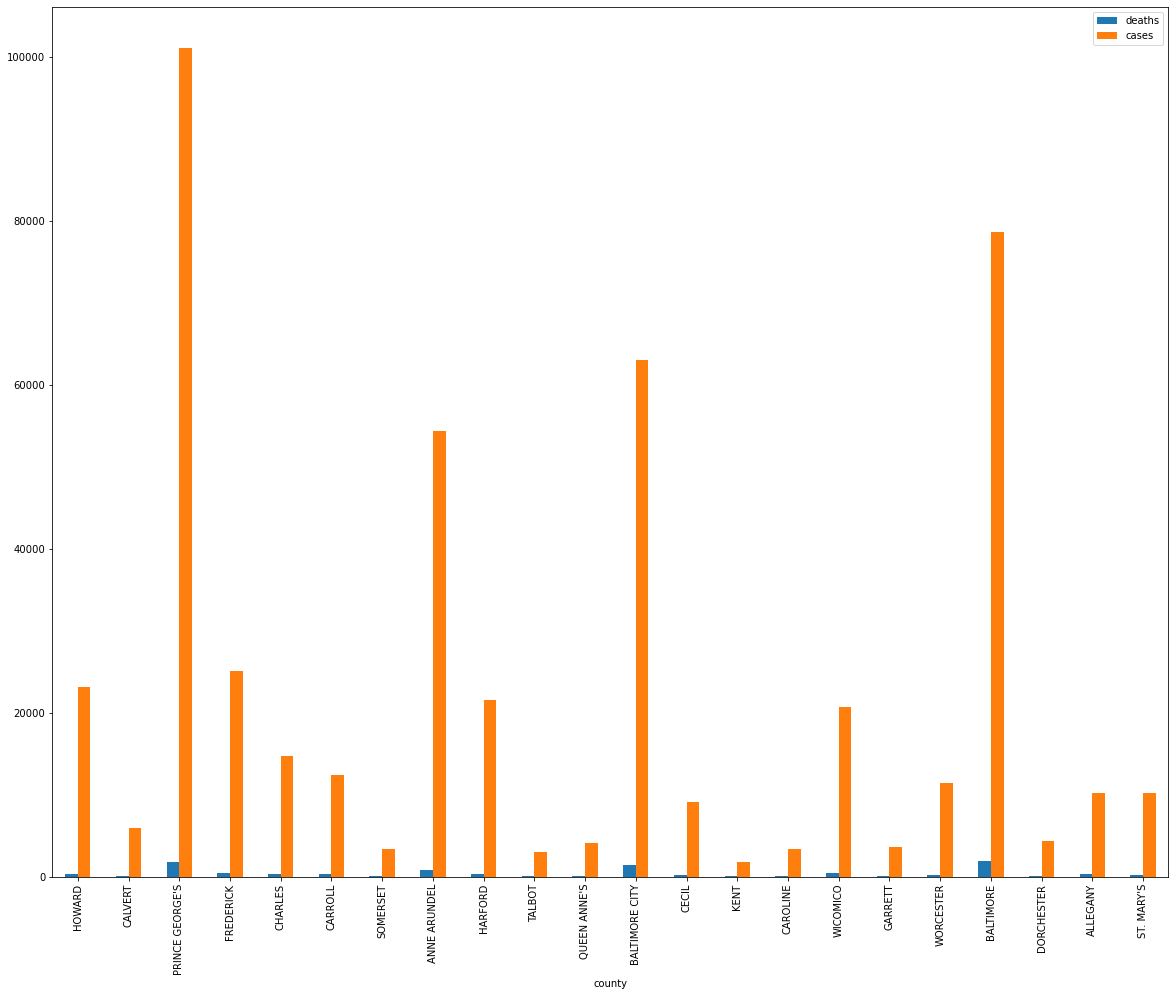

In [178]:
import pandas as pd 
import matplotlib.pyplot as plt 

mdSub.plot(x="county", y=["deaths", "cases"], kind="bar", figsize=(20,16))
plt.show()

# COVID-19 - Analysis, Visualization & Comparisons

In [179]:

#import pycountry_convert as pc
#import folium
#import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests

import numpy as np
#import calmap

#from keras.layers import Input, Dense, Activation, LeakyReLU, Dropout
#from keras import models
#from keras.optimizers import RMSprop, Adam

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [180]:
# Reading the Dataset

%cd C://Rtest/Covid19
# Download latest data from
# https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university/version/92

covid_confirm = pd.read_csv("RAW_global_confirmed_cases.csv")

# [['Country/Region','Province/State','Lat','Long','10/30/21','11/7/21']]
covid_confirm.head(10) #Let's see if it's loaded

covid_death = pd.read_csv("RAW_global_deaths.csv")
# [['Country/Region','Province/State','Lat','Long','10/30/21','11/7/21']]
covid_death.head(10) #Let's see if it's loaded



C:\Rtest\Covid19


,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,7288,7290,7291,7292,7292,7292,7293,7294,7295,7297
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,2966,2970,2975,2978,2983,2986,2990,2997,3004,3014
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,5950,5954,5960,5966,5971,5977,5984,5991,5997,6005
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,...,1721,1723,1723,1725,1726,1727,1727,1727,1729,1729
5,Antigua and Barbuda,NaN,17.06080,-61.796400,0,0,0,0,0,0,...,105,105,105,105,106,107,107,107,107,108
6,Argentina,NaN,-38.41610,-63.616700,0,0,0,0,0,0,...,116143,116165,116184,116209,116222,116228,116232,116250,116294,116313
7,Armenia,NaN,40.06910,45.038200,0,0,0,0,0,0,...,6700,6762,6831,6867,6937,6976,7016,7055,7107,7153
8,Australia,Australian Capital Territory,-35.47350,149.012400,0,0,0,0,0,0,...,14,14,14,14,14,14,14,14,14,14
9,Australia,New South Wales,-33.86880,151.209300,0,0,0,0,0,0,...,602,605,606,608,608,609,610,612,612,615


In [181]:
covid_confirm['Country/Region'].value_counts()

China             34
Canada            16
United Kingdom    12
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: Country/Region, Length: 196, dtype: int64

In [182]:
#uniqueValues = covid_confirm['Country/Region'].unique()
#uniqueValues

us = covid_confirm[covid_confirm['Country/Region'] == 'US']
us

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21
255,US,NaN,40.0,-100.0,1,1,2,2,5,5,...,46636670,46716709,46811405,46866719,47007119,47054618,47079428,47221527,47309008,47420114


In [183]:
covid_confirm[covid_confirm['Country/Region'] == 'United Kingdom']

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21
259,United Kingdom,Anguilla,18.220600,-63.068600,0,0,0,0,0,0,...,1039,1039,1077,1109,1109,1137,1137,1137,1175,1175
260,United Kingdom,Bermuda,32.307800,-64.750500,0,0,0,0,0,0,...,5688,5688,5688,5692,5708,5708,5708,5708,5713,5714
261,United Kingdom,British Virgin Islands,18.420700,-64.640000,0,0,0,0,0,0,...,2725,2745,2745,2745,2745,2745,2745,2745,2745,2765
262,United Kingdom,Cayman Islands,19.313300,-81.254600,0,0,0,0,0,0,...,2676,2676,2676,3427,3427,3427,3427,4203,4203,4203
263,United Kingdom,Channel Islands,49.372300,-2.364400,0,0,0,0,0,0,...,13968,13968,14190,14379,14519,14519,14519,15045,15180,15385
264,United Kingdom,Falkland Islands (Malvinas),-51.796300,-59.523600,0,0,0,0,0,0,...,78,78,79,79,79,79,79,79,79,79
265,United Kingdom,Gibraltar,36.140800,-5.353600,0,0,0,0,0,0,...,6168,6206,6256,6328,6385,6464,6509,6561,6634,6721
266,United Kingdom,Isle of Man,54.236100,-4.548100,0,0,0,0,0,0,...,9991,10046,10106,10159,10194,10225,10255,10296,10354,10412
267,United Kingdom,Montserrat,16.742498,-62.187366,0,0,0,0,0,0,...,41,41,41,41,41,41,41,41,41,41
268,United Kingdom,"Saint Helena, Ascension and Tristan da Cunha",-7.946700,-14.355900,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [184]:
# Aggregate by Country
confirm = covid_confirm.groupby('Country/Region').agg('sum')
death   = covid_death.groupby('Country/Region').agg('sum')

print('Confirmed Cases by Country:''\n')
display(confirm.head())
print('Deaths by Country:''\n')
display(death.head())

Confirmed Cases by Country:



,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,156397,156397,156414,156456,156487,156510,156552,156610,156649,156739
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,189355,190125,190815,191440,192013,192600,193075,193269,193856,194472
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,207254,207385,207509,207624,207764,207873,207970,208104,208245,208380
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,15705,15717,15744,15744,15819,15819,15819,15907,15929,15972
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,64724,64762,64815,64857,64875,64899,64913,64913,64940,64968


Deaths by Country:



,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,7288,7290,7291,7292,7292,7292,7293,7294,7295,7297
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,2966,2970,2975,2978,2983,2986,2990,2997,3004,3014
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,5950,5954,5960,5966,5971,5977,5984,5991,5997,6005
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,1721,1723,1723,1725,1726,1727,1727,1727,1729,1729


# Global Covid-19 Data

In [185]:
import numpy as np
import pandas as pd
import datetime as datetime
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [186]:
cases= pd.read_csv('CONVENIENT_global_confirmed_cases.csv')
cases[-3:]

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
663,11/15/21,58.0,194.0,134.0,88.0,0.0,0.0,1417.0,378.0,12.0,...,39270.0,132.0,232.0,0.0,755.0,8616.0,522.0,18.0,13.0,10.0
664,11/16/21,39.0,587.0,141.0,22.0,27.0,4.0,1622.0,572.0,6.0,...,36821.0,211.0,189.0,0.0,0.0,10259.0,236.0,0.0,12.0,67.0
665,11/17/21,90.0,616.0,135.0,43.0,28.0,7.0,1553.0,982.0,25.0,...,37868.0,255.0,228.0,0.0,1729.0,9849.0,87.0,11.0,12.0,52.0


In [187]:
casesUS=cases[['Country/Region','US']].copy()
casesUS.columns=['date','cases']
casesUS2=casesUS.drop([0])

casesUS2

,date,cases
1,1/23/20,0.0
2,1/24/20,1.0
3,1/25/20,0.0
4,1/26/20,3.0
5,1/27/20,0.0
...,...,...
661,11/13/21,47499.0
662,11/14/21,24810.0
663,11/15/21,142099.0
664,11/16/21,87481.0


In [188]:
casesUS2['date']=pd.to_datetime(casesUS2['date'],format='%m/%d/%y') 
casesUS2['max cases']=casesUS2['cases'].rolling(window=7).max()
casesUS2['mean cases']=casesUS2['cases'].rolling(window=7).mean()
casesUS2['min cases']=casesUS2['cases'].rolling(window=7).min()
casesUS2[-20:]

,date,cases,max cases,mean cases,min cases
646,2021-10-29,93596.0,116357.0,71917.142857,17420.0
647,2021-10-30,31648.0,116357.0,72313.285714,17420.0
648,2021-10-31,30979.0,116357.0,74250.285714,30979.0
649,2021-11-01,115597.0,115597.0,74141.714286,30979.0
650,2021-11-02,71081.0,115597.0,74478.285714,30979.0
651,2021-11-03,84547.0,115597.0,72142.428571,30979.0
652,2021-11-04,81822.0,115597.0,72752.857143,30979.0
653,2021-11-05,96068.0,115597.0,73106.000000,30979.0
654,2021-11-06,32852.0,115597.0,73278.000000,30979.0
655,2021-11-07,35257.0,115597.0,73889.142857,32852.0


In [189]:
fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=casesUS2['date'],y=casesUS2['max cases'],name="7-day max"),secondary_y=False,)
fig.add_trace(go.Scatter(x=casesUS2['date'],y=casesUS2['mean cases'],name="7-day mean"),secondary_y=False,)
fig.add_trace(go.Scatter(x=casesUS2['date'],y=casesUS2['min cases'],name="7-day min"),secondary_y=False,)
fig.update_layout(autosize=False,width=1000,height=700,title_text="Positive cases (7-day rolling) in US")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Cases",secondary_y=False)
fig.show()

In [190]:
# Vaccination Progress data
vaccine=pd.read_csv("country_vaccinations.csv")  # https://www.kaggle.com/gpreda/covid-world-vaccination-progress
vaccineUS=vaccine.loc[vaccine['country']=='United States']
vaccineUS[-3:]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
55765,United States,USA,2021-11-14,443281184.0,227663683.0,193952113.0,271379.0,1165403.0,131.80,67.69,57.67,3465.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
55766,United States,USA,2021-11-15,443374199.0,227691941.0,193963821.0,93015.0,1000051.0,131.83,67.70,57.67,2973.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
55767,United States,USA,2021-11-16,443374199.0,227691941.0,193963821.0,0.0,800758.0,131.83,67.70,57.67,2381.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


In [191]:
vaccineUS2=vaccineUS[['date','people_vaccinated','people_fully_vaccinated','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred']].copy()
vaccineUS2['people_vaccinated']=vaccineUS2['people_vaccinated'].fillna(method='ffill')
vaccineUS2['people_fully_vaccinated']=vaccineUS2['people_fully_vaccinated'].fillna(method='ffill')
vaccineUS2['people_vaccinated_per_hundred'] = vaccineUS2['people_vaccinated_per_hundred'].fillna(method='ffill')
vaccineUS2['people_fully_vaccinated_per_hundred'] = vaccineUS2['people_fully_vaccinated_per_hundred'].fillna(method='ffill')
vaccineUS2[-3:]

,date,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
55765,2021-11-14,227663683.0,193952113.0,67.69,57.67
55766,2021-11-15,227691941.0,193963821.0,67.70,57.67
55767,2021-11-16,227691941.0,193963821.0,67.70,57.67


In [192]:
fig = make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=vaccineUS2['date'],y=vaccineUS2['people_vaccinated'],name='People vaccinated' ),secondary_y=False,)
fig.add_trace(go.Scatter(x=vaccineUS2['date'],y=vaccineUS2['people_fully_vaccinated'],name='People fully vaccinated '),secondary_y=False,)
fig.update_layout(autosize=False,width=1000,height=700,title_text="Vaccination Progress in US")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Vaccinated",secondary_y=False)
fig.show()

In [193]:
fig = make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=vaccineUS2['date'], y=vaccineUS2['people_vaccinated_per_hundred'],name ='% People vaccinated' ),secondary_y=False,)
fig.add_trace(go.Scatter(x=vaccineUS2['date'], y=vaccineUS2['people_fully_vaccinated_per_hundred'],name='% People fully vaccinated'),secondary_y=False,)
fig.update_layout(autosize=False,width=1000,height=700,title_text="% Vaccination Progress in US")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="% Vaccinated",secondary_y=False)
fig.show()

In [194]:
# Vaccination Progress by Manufacture

manu=pd.read_csv('country_vaccinations_by_manufacturer.csv')  # https://www.kaggle.com/gpreda/covid-world-vaccination-progress
# manu[-3:]

manuUS=manu[manu['location']=='United States']
# manuUS[-10:]

manuUS['date']=pd.to_datetime(manuUS['date']) # when the same looking, format setting not necessary
manuUS=manuUS.reset_index(drop=True)
manuUS[-10:]

,location,date,vaccine,total_vaccinations
831,United States,2021-11-13,Pfizer/BioNTech,255432746
832,United States,2021-11-14,Johnson&Johnson,16169549
833,United States,2021-11-14,Moderna,167679443
834,United States,2021-11-14,Pfizer/BioNTech,256253584
835,United States,2021-11-15,Johnson&Johnson,16200158
836,United States,2021-11-15,Moderna,168242391
837,United States,2021-11-15,Pfizer/BioNTech,257105458
838,United States,2021-11-16,Johnson&Johnson,16233985
839,United States,2021-11-16,Moderna,168812041
840,United States,2021-11-16,Pfizer/BioNTech,257869920


In [195]:
manuUSp=manuUS[manuUS['vaccine']=='Pfizer/BioNTech']
manuUSm=manuUS[manuUS['vaccine']=='Moderna']
manuUSj=manuUS[manuUS['vaccine']=='Johnson&Johnson']

In [196]:
fig = make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=manuUSp['date'], y=manuUSp['total_vaccinations'],name ='Pfizer/BioNTech' ),secondary_y=False,)
fig.add_trace(go.Scatter(x=manuUSm['date'], y=manuUSm['total_vaccinations'],name='Moderna'),secondary_y=False,)
fig.add_trace(go.Scatter(x=manuUSj['date'], y=manuUSj['total_vaccinations'],name='Johnson&Johnson'),secondary_y=False,)

fig.update_layout(autosize=False,width=1000,height=700,title_text="Vaccination Progress by Manufacture in Japan")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Total Vaccinated",secondary_y=False)
fig.show()

In [197]:
# Vaccination Progress World Ranking
vaccine3=vaccine[['country','people_fully_vaccinated_per_hundred','date']].copy()
vaccine4=vaccine3.groupby(['country'], as_index=False).max()
vaccine5=vaccine4.sort_values('people_fully_vaccinated_per_hundred',ascending=False).reset_index(drop=True)
rank=vaccine5[vaccine5['country']=='United States'].index.values[0]+1
date=vaccine5[vaccine5['country']=='United States']['date'].values[0]
print('United States is the '+str(rank)+'th in the world vaccination rankings as of '+str(date)+'.' )

vaccine5[80:100]

United States is the 85th in the world vaccination rankings as of 2021-11-16.


,country,people_fully_vaccinated_per_hundred,date
80,Turkey,58.53,2021-11-16
81,Ecuador,58.51,2021-11-12
82,Saint Helena,57.93,2021-05-05
83,Czechia,57.90,2021-11-16
84,United States,57.67,2021-11-16
85,New Caledonia,57.11,2021-11-15
86,Curacao,56.89,2021-11-13
87,Sint Maarten (Dutch part),56.46,2021-11-12
88,Macao,54.97,2021-11-04
89,Panama,54.77,2021-11-16


In [198]:
vaccine5[0:20]

,country,people_fully_vaccinated_per_hundred,date
0,Gibraltar,118.18,2021-11-16
1,Pitcairn,100.00,2021-09-07
2,Singapore,91.91,2021-11-05
3,United Arab Emirates,88.40,2021-11-15
4,Portugal,87.56,2021-11-08
5,Malta,83.48,2021-11-15
6,Cayman Islands,82.95,2021-11-12
7,Chile,81.89,2021-11-14
8,Iceland,81.48,2021-11-16
9,Spain,80.18,2021-11-15


In [199]:
# Daily cases vs vaccination - United States

country='United States'   #Selected Country
countryConf='US'   #Selected Country

#reading dataset covid19 confirm cases
dfcases= pd.read_csv("CONVENIENT_global_confirmed_cases.csv")

#copy from the selected country
dfcases = dfcases[['Country/Region',countryConf]].copy()

dfcases.columns=['date','cases']           #rename columns
dfcases =dfcases.drop([0])                 #drop the first row

#convert object  to date
dfcases['date'] =  pd.to_datetime(dfcases['date'], format='%m/%d/%y')
dfcases


,date,cases
1,2020-01-23,0.0
2,2020-01-24,1.0
3,2020-01-25,0.0
4,2020-01-26,3.0
5,2020-01-27,0.0
...,...,...
661,2021-11-13,47499.0
662,2021-11-14,24810.0
663,2021-11-15,142099.0
664,2021-11-16,87481.0


In [200]:
#reading dataset covid19 deaths
dfdeaths= pd.read_csv("CONVENIENT_global_deaths.csv")

#copy from the selected country
dfdeaths = dfdeaths[['Country/Region',countryConf]].copy()

dfdeaths.columns=['date','deaths']           #rename columns
dfdeaths =dfdeaths.drop([0])                 #drop the first row

#convert object  to date
dfdeaths['date'] =  pd.to_datetime(dfdeaths['date'], format='%m/%d/%y')

dfdeaths


,date,deaths
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
5,2020-01-27,0.0
...,...,...
661,2021-11-13,452.0
662,2021-11-14,120.0
663,2021-11-15,1271.0
664,2021-11-16,1448.0


In [201]:
#merge cases and deaths data
dfcases = pd.merge(dfcases,dfdeaths, how='left' , left_on='date', right_on='date')
dfcases

,date,cases,deaths
0,2020-01-23,0.0,0.0
1,2020-01-24,1.0,0.0
2,2020-01-25,0.0,0.0
3,2020-01-26,3.0,0.0
4,2020-01-27,0.0,0.0
...,...,...,...
660,2021-11-13,47499.0,452.0
661,2021-11-14,24810.0,120.0
662,2021-11-15,142099.0,1271.0
663,2021-11-16,87481.0,1448.0


In [202]:
#reading dataset vaccination progress
dfvac= pd.read_csv("country_vaccinations.csv")

#copy date and data from selected country
dfvac = dfvac.loc[dfvac['country']==country]
dfvac.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
55429,United States,USA,2020-12-13,21027.0,17893.0,3756.0,NaN,NaN,0.01,0.01,0.0,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
55430,United States,USA,2020-12-14,25342.0,22072.0,3852.0,4315.0,4315.0,0.01,0.01,0.0,13.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
55431,United States,USA,2020-12-15,74003.0,68543.0,4037.0,48661.0,26488.0,0.02,0.02,0.0,79.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
55432,United States,USA,2020-12-16,232766.0,221883.0,4412.0,158763.0,70580.0,0.07,0.07,0.0,210.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
55433,United States,USA,2020-12-17,503357.0,485460.0,4961.0,270591.0,120582.0,0.15,0.14,0.0,359.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


In [203]:
#convert object to date
dfvac['date'] =  pd.to_datetime(dfvac['date'], format='%Y-%m-%d')

#merge dataset vaccination progress and dataset from cases in Israel
df = pd.merge(dfcases,dfvac, how='left' , left_on='date', right_on='date')
df.head()

,date,cases,deaths,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,2020-01-23,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-24,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-25,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-26,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-27,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
#copy date, cases, people_vaccinated,people_fully_vaccinated
df = df[['date','cases','deaths','people_vaccinated','people_fully_vaccinated']].copy()

#Replace NaN Values with Zeros
df['people_vaccinated'] = df['people_vaccinated'].fillna(0)
df['people_fully_vaccinated'] = df['people_fully_vaccinated'].fillna(0)
df.tail(10)


,date,cases,deaths,people_vaccinated,people_fully_vaccinated
655,2021-11-08,112322.0,1230.0,225268973.0,193236420.0
656,2021-11-09,80039.0,1431.0,225718269.0,193385814.0
657,2021-11-10,94696.0,1626.0,226195941.0,193535901.0
658,2021-11-11,55314.0,760.0,226644497.0,193668031.0
659,2021-11-12,140400.0,2483.0,227149368.0,193835988.0
660,2021-11-13,47499.0,452.0,227545172.0,193923090.0
661,2021-11-14,24810.0,120.0,227663683.0,193952113.0
662,2021-11-15,142099.0,1271.0,227691941.0,193963821.0
663,2021-11-16,87481.0,1448.0,227691941.0,193963821.0
664,2021-11-17,111106.0,1620.0,0.0,0.0


In [205]:
#df2 = df.loc[(df['date']>'2021-05-16') & (df['people_vaccinated'] == 0) ]

#remove last invalid rows 
df.drop(df[    (df['date']>'2021-11-17') & (df['people_vaccinated'] == 0)    ].index, inplace = True)
df.tail(15)

,date,cases,deaths,people_vaccinated,people_fully_vaccinated
650,2021-11-03,84547.0,1925.0,223588681.0,192518951.0
651,2021-11-04,81822.0,1150.0,223932289.0,192694985.0
652,2021-11-05,96068.0,2085.0,224360599.0,192905511.0
653,2021-11-06,32852.0,392.0,224682838.0,193014401.0
654,2021-11-07,35257.0,125.0,224866866.0,193079821.0
655,2021-11-08,112322.0,1230.0,225268973.0,193236420.0
656,2021-11-09,80039.0,1431.0,225718269.0,193385814.0
657,2021-11-10,94696.0,1626.0,226195941.0,193535901.0
658,2021-11-11,55314.0,760.0,226644497.0,193668031.0
659,2021-11-12,140400.0,2483.0,227149368.0,193835988.0


In [206]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=df['date'], y=df['cases'], name="Cases"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df['date'], y=df['deaths'], name="Deaths"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df['date'], y=df['people_vaccinated'], name = 'People vaccinated' ),
    secondary_y=True,
)
fig.add_trace(
    go.Scatter(x=df['date'], y=df['people_fully_vaccinated'],name = 'People Fully vaccinated '),
    secondary_y= True,
)

fig.update_layout(
    autosize=False,
    width=1000,
    height=700,
    title_text="Daily cases vs vaccination - "+country
)

fig.update_xaxes(title_text="Date")

fig.update_yaxes(title_text="Cases of covid", secondary_y=False)
fig.update_yaxes(title_text="Vaccinated", secondary_y=True)

fig.show()

In [207]:
#reading dataset world population
dfpo= pd.read_csv("population_by_country_2020.csv")

#get Population of Israel 2020
dfpo = dfpo.loc[dfpo['Country (or dependency)']==country]
dfpo.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %


In [208]:
#get in variable to convert
population= dfpo['Population (2020)'].values[0]
print('US population in 2020: ', population)

US population in 2020:  331341050


In [209]:
# calculate % of people vaccinated in selected country
df['% people_vaccinated'] = df['people_vaccinated']*100/population
df['% people_fully_vaccinated'] = df['people_fully_vaccinated']*100/population
df.head()

,date,cases,deaths,people_vaccinated,people_fully_vaccinated,% people_vaccinated,% people_fully_vaccinated
0,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-24,1.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-26,3.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0


In [210]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=df['date'], y=df['cases'], name="Cases"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df['date'], y=df['deaths'], name="Deaths"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df['date'], y=df['% people_vaccinated'], name = '% People vaccinated' ),
    secondary_y=True,
)
fig.add_trace(
    go.Scatter(x=df['date'], y=df['% people_fully_vaccinated'],name = '% People Fully vaccinated '),
    secondary_y= True,
)

fig.update_layout(
    autosize=False,
    width=1000,
    height=700,
    title_text="Daily cases vs % vaccination - "+country
)

fig.update_xaxes(title_text="Date")

fig.update_yaxes(title_text="Cases of covid", secondary_y=False)
fig.update_yaxes(title_text="% Vaccinated", secondary_y=True)

fig.show()

In [211]:
# Death trend only

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=df['date'], y=df['deaths'], name="Deaths"),
    secondary_y=False,
)

fig.update_layout(
    autosize=False,
    width=1000,
    height=700,
    title_text="Daily cases - "+country
)

fig.update_xaxes(title_text="Date")

fig.update_yaxes(title_text="Deaths of covid", secondary_y=False)

fig.show()

In [212]:
# Last X days
x = 7 

dfx = df[-x:]

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=dfx['date'], y=dfx['cases'], name="Cases"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=dfx['date'], y=dfx['deaths'], name="Deaths"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=dfx['date'], y=dfx['people_vaccinated'], name = 'People vaccinated' ),
    secondary_y=True,
)
fig.add_trace(
    go.Scatter(x=dfx['date'], y=dfx['people_fully_vaccinated'],name = 'People Fully vaccinated '),
    secondary_y= True,
)

fig.update_layout(
    autosize=False,
    width=1000,
    height=700,
    title_text="Daily cases vs vaccination - "+country
)

fig.update_xaxes(title_text="Date")

fig.update_yaxes(title_text="Cases of covid", secondary_y=False)
fig.update_yaxes(title_text="Vaccinated", secondary_y=True)

fig.show()

In [213]:
df[-x:]

,date,cases,deaths,people_vaccinated,people_fully_vaccinated,% people_vaccinated,% people_fully_vaccinated
658,2021-11-11,55314.0,760.0,226644497.0,193668031.0,68.402179,58.449755
659,2021-11-12,140400.0,2483.0,227149368.0,193835988.0,68.554551,58.500445
660,2021-11-13,47499.0,452.0,227545172.0,193923090.0,68.674006,58.526733
661,2021-11-14,24810.0,120.0,227663683.0,193952113.0,68.709773,58.535492
662,2021-11-15,142099.0,1271.0,227691941.0,193963821.0,68.718301,58.539025
663,2021-11-16,87481.0,1448.0,227691941.0,193963821.0,68.718301,58.539025
664,2021-11-17,111106.0,1620.0,0.0,0.0,0.000000,0.000000


In [214]:
# Global Covid EDA

df1 = pd.read_csv('CONVENIENT_global_deaths.csv')
display('Deaths DF - Data SnapShot', df1.tail(3))

'Deaths DF - Data SnapShot'

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
663,11/15/21,1.0,7.0,7.0,0.0,0.0,0.0,18.0,39.0,0.0,...,47.0,1.0,2.0,0.0,8.0,101.0,11.0,3.0,0.0,1.0
664,11/16/21,1.0,7.0,6.0,0.0,2.0,0.0,44.0,52.0,0.0,...,214.0,2.0,2.0,0.0,0.0,87.0,7.0,0.0,0.0,1.0
665,11/17/21,2.0,10.0,8.0,0.0,0.0,1.0,19.0,46.0,0.0,...,201.0,1.0,4.0,0.0,15.0,67.0,3.0,3.0,0.0,1.0


In [215]:
#Get Total Deaths for Each Country

df1a = df1.sum(axis = 0).reset_index()

#Remove Row which isn't a date
df1a = df1a.iloc[1: , :]

#Rename Column 
df1a = df1a.rename(columns = {0:"Deaths", 'index' : 'Country'})

#New DF for Deaths Sum
df1_final = pd.DataFrame()

for a,b in df1a.iterrows():
    try:
        if b['Deaths'] % 1 == 0:
            df1_final = df1_final.append(b)
    except:
        pass

df1_final = df1_final.sort_values('Deaths',ascending = False)

df1_final.set_index('Country').head(10)

,Deaths
Country,
US,767431.0
Brazil,611851.0
India,464153.0
Mexico,291573.0
Russia,254229.0
Peru,200741.0
Indonesia,143698.0
United Kingdom.11,143360.0
Italy,132965.0


Total Deaths in the World: 5,082,997


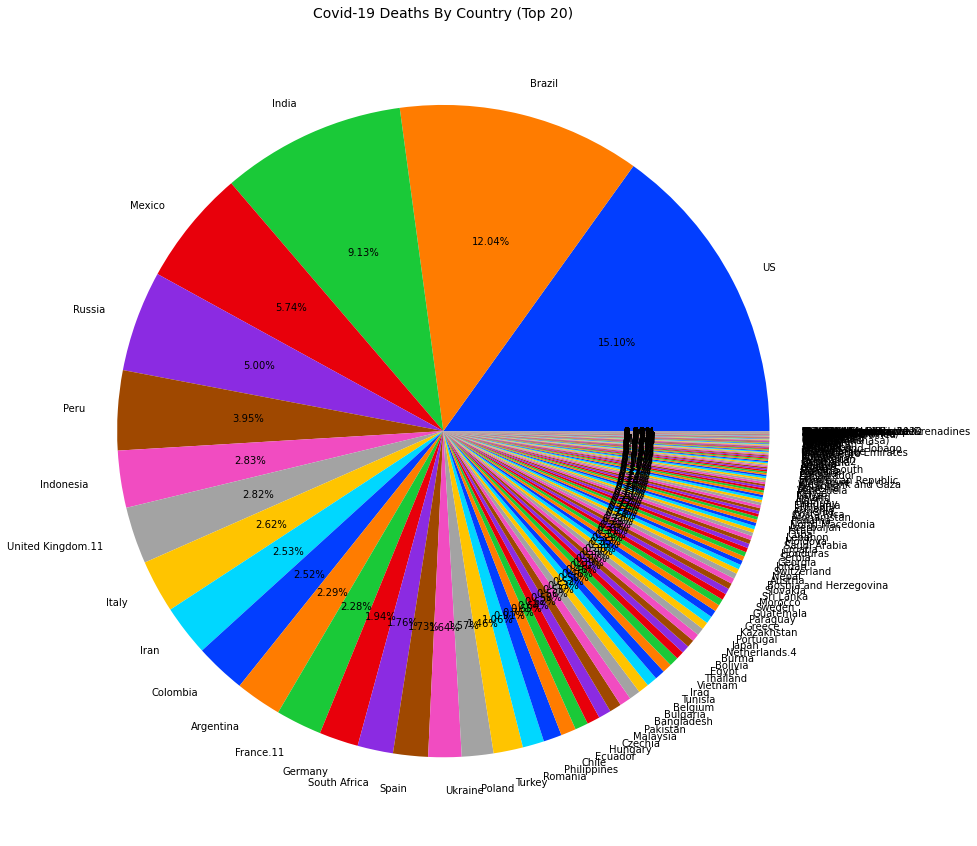

"\ndf1_final.set_index('Country').    plot(kind = 'pie',y ='Deaths',          legend = False,ylabel = '',         title = 'Covid-19 Deaths By Country',         fontsize = 10,         figsize = (15,15))\n"

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

print('Total Deaths in the World:', '{:,.0f}'.format(df1_final['Deaths'].sum()))
#define data
data = df1_final['Deaths']
labels = df1_final['Country']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:10]
plt.figure(figsize=(15,15))
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')

plt.title("Covid-19 Deaths By Country (Top 20)", fontsize=14)

plt.show()

'''
df1_final.set_index('Country').\
    plot(kind = 'pie',y ='Deaths', \
         legend = False,ylabel = '',\
         title = 'Covid-19 Deaths By Country',\
         fontsize = 10,\
         figsize = (15,15))
'''

Total Deaths in top 20 Countries: 4,065,935


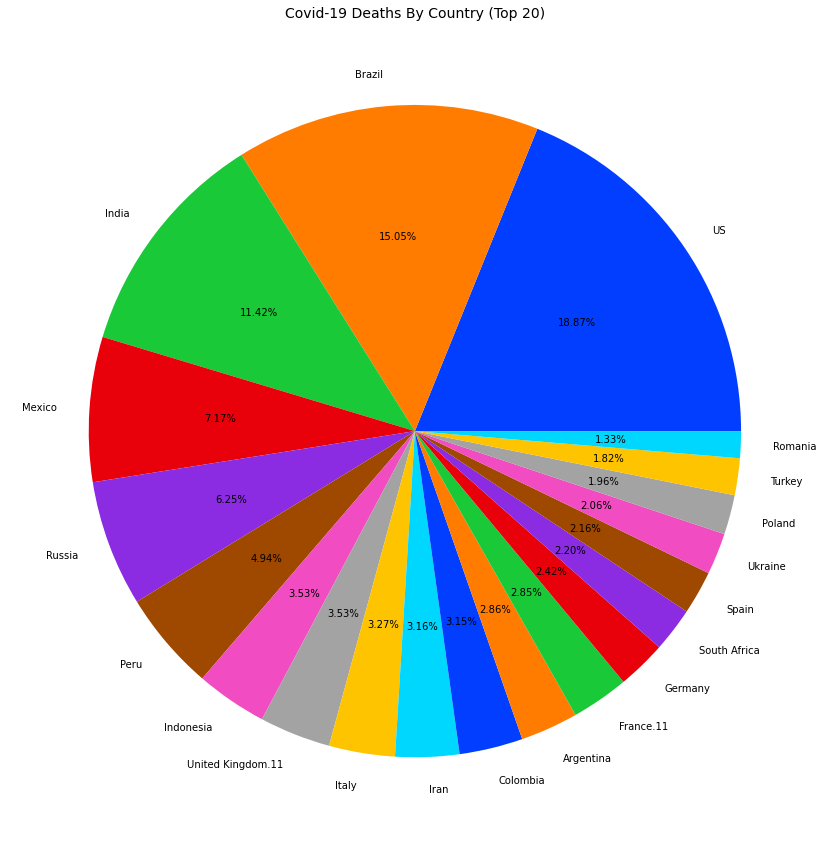

In [217]:
deathTop = df1_final.head(20)

print('Total Deaths in top 20 Countries:', '{:,.0f}'.format(deathTop['Deaths'].sum()))
#define data
data = deathTop['Deaths']
labels = deathTop['Country']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:10]
plt.figure(figsize=(15,15))
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')

plt.title("Covid-19 Deaths By Country (Top 20)", fontsize=14)

plt.show()

In [218]:
deathTop

,Country,Deaths
256,US,767431.0
31,Brazil,611851.0
148,India,464153.0
184,Mexico,291573.0
218,Russia,254229.0
212,Peru,200741.0
149,Indonesia,143698.0
271,United Kingdom.11,143360.0
154,Italy,132965.0
150,Iran,128531.0


In [219]:
# Get Global Cases Data

df2 = pd.read_csv('CONVENIENT_global_confirmed_cases.csv')
display('Cases DF - Data SnapShot',df1.tail(2))

'Cases DF - Data SnapShot'

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
664,11/16/21,1.0,7.0,6.0,0.0,2.0,0.0,44.0,52.0,0.0,...,214.0,2.0,2.0,0.0,0.0,87.0,7.0,0.0,0.0,1.0
665,11/17/21,2.0,10.0,8.0,0.0,0.0,1.0,19.0,46.0,0.0,...,201.0,1.0,4.0,0.0,15.0,67.0,3.0,3.0,0.0,1.0


In [220]:
#Get Total Deaths for Each Country
df2a = df2.sum(axis = 0).reset_index()

#Remove Row which isn't a date
df2a = df2a.iloc[1: , :]
#Rename Column 
df2a = df2a.rename(columns = {0:"Cases",'index':'Country'})

#New DF for Global Sums
df2a_final = pd.DataFrame()

for a,b in df2a.iterrows():
    try:
        if b['Cases'] % 1 == 0:
            df2a_final = df2a_final.append(b)
    except:
        pass

#Sort Death Count Descending
df2a_final = df2a_final.sort_values('Cases',ascending = False)

df2a_final.set_index('Country').head(10)

,Cases
Country,
US,47420113.0
India,34466598.0
Brazil,21977661.0
United Kingdom.11,9675058.0
Russia,9027163.0
Turkey,8482956.0
France.11,7149118.0
Iran,6057893.0
Argentina,5310334.0


In [221]:
print('Total Covid-19 Cases in the World :', '{:,.0f}'.format(df2a_final['Cases'].sum()))
print('Total Covid-19 Deaths in the World:', '{:,.0f}'.format(df1_final['Deaths'].sum()))


Total Covid-19 Cases in the World : 252,543,596
Total Covid-19 Deaths in the World: 5,082,997


Total Cases in the World: 252,543,596


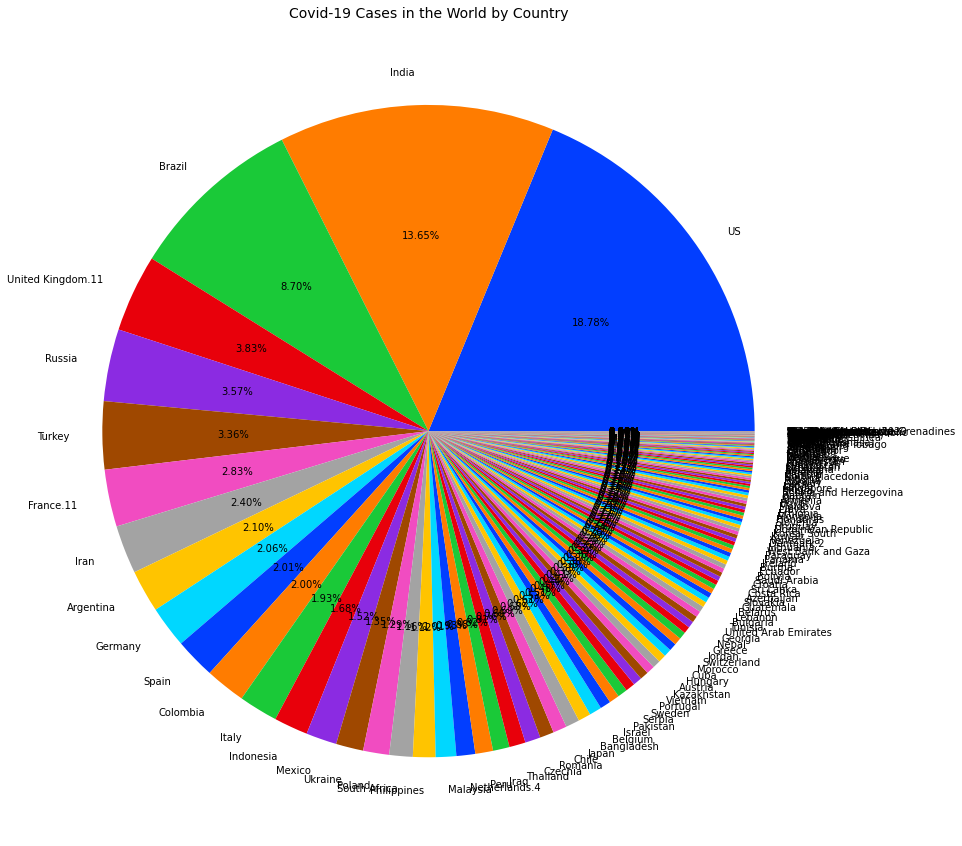

In [222]:
print('Total Cases in the World:', '{:,.0f}'.format(df2a_final['Cases'].sum()))

#define data
data = df2a_final['Cases']
labels = df2a_final['Country']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:10]
plt.figure(figsize=(15,15))
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')

plt.title("Covid-19 Cases in the World by Country", fontsize=14)

plt.show()


Total Cases in top 20 Countries: 192,856,837


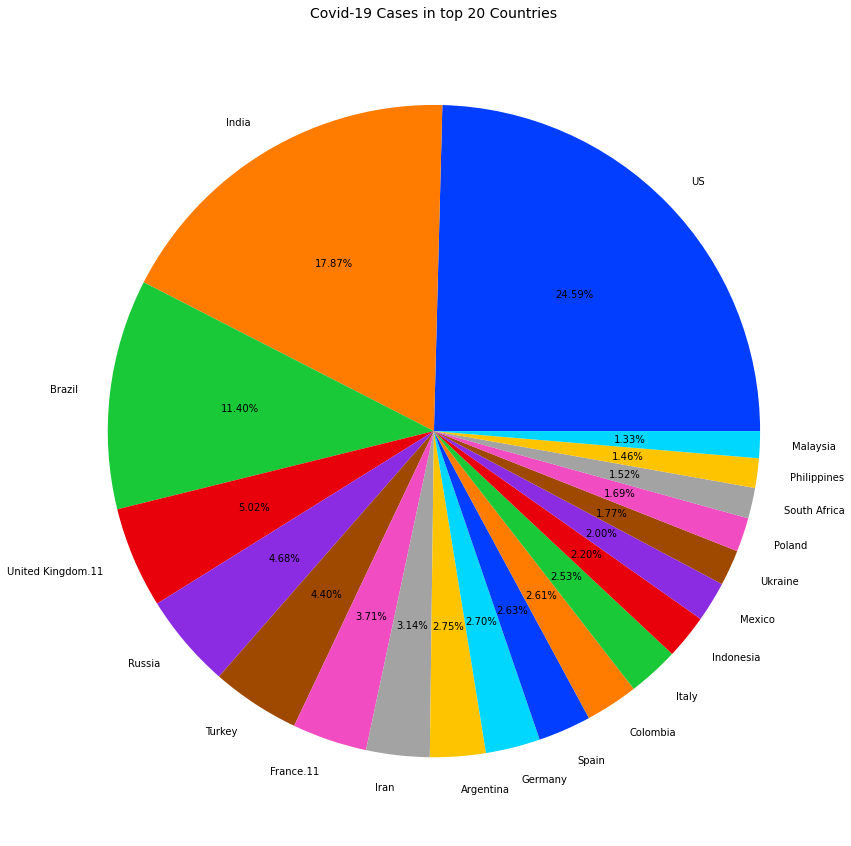

In [223]:
# Top 20 countries
caseTop = df2a_final.head(20)

print('Total Cases in top 20 Countries:', '{:,.0f}'.format(caseTop['Cases'].sum()))

#define data
data = caseTop['Cases']
labels = caseTop['Country']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:10]
plt.figure(figsize=(15,15))
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')

plt.title("Covid-19 Cases in top 20 Countries", fontsize=14)

plt.show()

In [224]:
# Function for showing values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:,.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


Total Cases in top 20 Countries: 192,856,837


[Text(0, 0, '0'),
 Text(0, 0, '10,000,000'),
 Text(0, 0, '20,000,000'),
 Text(0, 0, '30,000,000'),
 Text(0, 0, '40,000,000'),
 Text(0, 0, '50,000,000')]

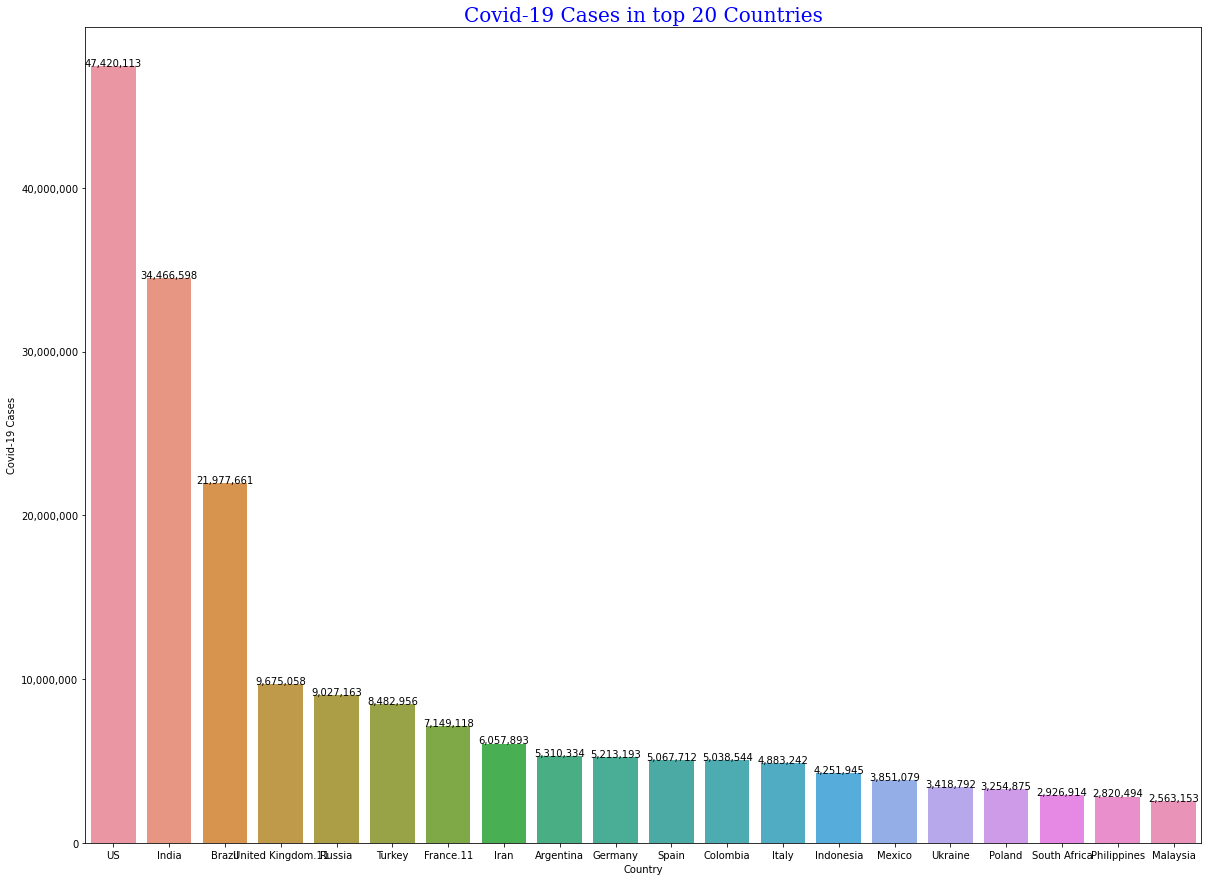

In [225]:
# Top 20 countries
caseTop = df2a_final.head(20)

print('Total Cases in top 20 Countries:', '{:,.0f}'.format(caseTop['Cases'].sum()))

plt.figure(figsize=(20,15))

p= sns.barplot(data = caseTop ,x = 'Country' ,y = 'Cases',ci = None )
show_values_on_bars(p)

font1 = {'family':'serif','color':'blue','size':20}
plt.title("Covid-19 Cases in top 20 Countries", fontdict = font1)

plt.xlabel("Country")
plt.ylabel("Covid-19 Cases")

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

Total Deaths in top 20 Countries: 4,065,935


[Text(0, 0, '0'),
 Text(0, 0, '100,000'),
 Text(0, 0, '200,000'),
 Text(0, 0, '300,000'),
 Text(0, 0, '400,000'),
 Text(0, 0, '500,000'),
 Text(0, 0, '600,000'),
 Text(0, 0, '700,000'),
 Text(0, 0, '800,000'),
 Text(0, 0, '900,000')]

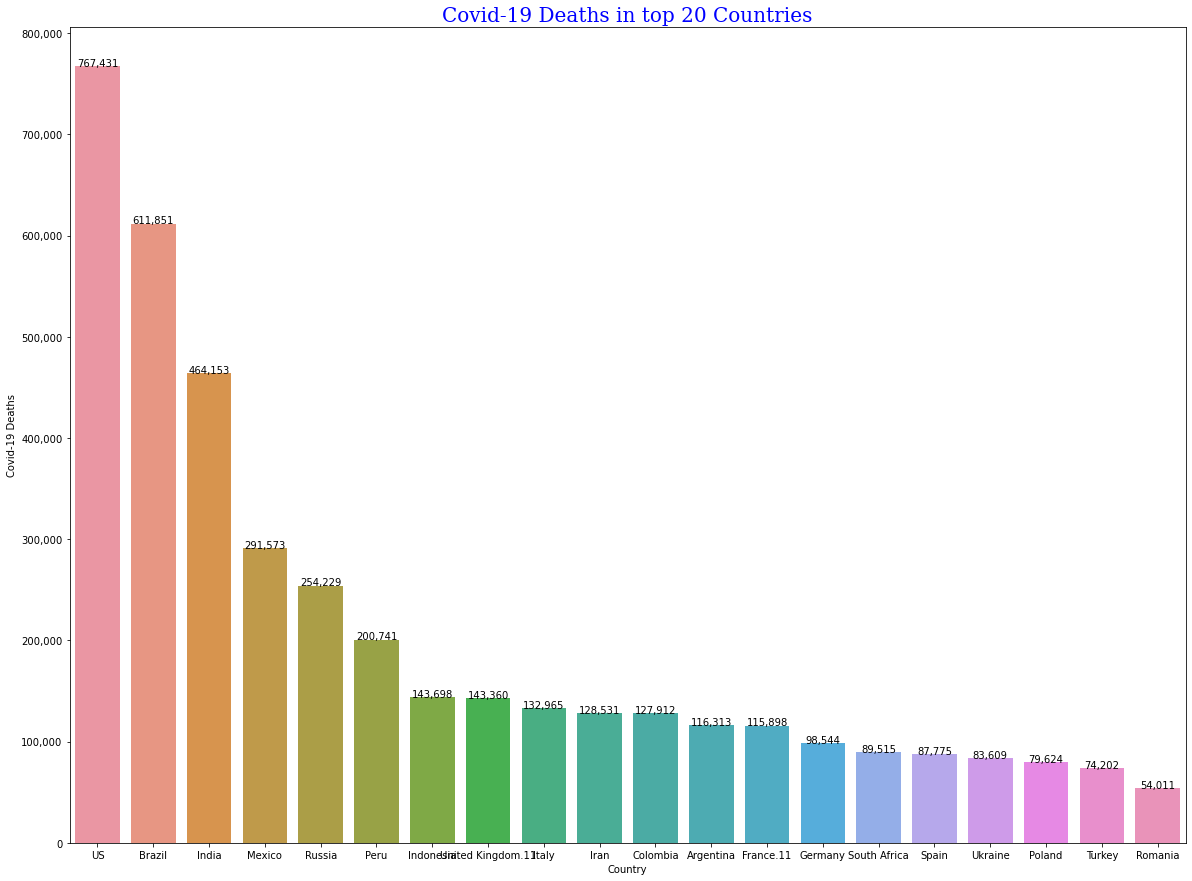

In [226]:
# Top 20 countries
deathTop = df1_final.head(20)

print('Total Deaths in top 20 Countries:', '{:,.0f}'.format(deathTop['Deaths'].sum()))

plt.figure(figsize=(20,15))

p= sns.barplot(data = deathTop ,x = 'Country' ,y = 'Deaths',ci = None )
show_values_on_bars(p)

font1 = {'family':'serif','color':'blue','size':20}
plt.title("Covid-19 Deaths in top 20 Countries", fontdict = font1)

plt.xlabel("Country")
plt.ylabel("Covid-19 Deaths")

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [227]:
# Rolling Sums
df1 = df1.iloc[1: , :]
df2 = df2.iloc[1: , :]

In [228]:
deathTop = df1_final.head(20)
deathTop

,Country,Deaths
256,US,767431.0
31,Brazil,611851.0
148,India,464153.0
184,Mexico,291573.0
218,Russia,254229.0
212,Peru,200741.0
149,Indonesia,143698.0
271,United Kingdom.11,143360.0
154,Italy,132965.0
150,Iran,128531.0


In [229]:
countries = df1.columns[1:]
countries

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Australia.1',
       ...
       'United Kingdom.11', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=280)

In [230]:
# 7 Day window

deaths_df_window = pd.DataFrame() 
cases_df_window = pd.DataFrame()

for a in countries:
    try:
        aa = df1[['Country/Region',a]].rolling(window=7).sum()[-30:]
        deaths_df_window = pd.concat([deaths_df_window,aa],axis = 1)
        
        b = df2[['Country/Region',a]].rolling(window=7).sum()[-30:]
        cases_df_window = pd.concat([cases_df_window,b],axis = 1)
    except:
        pass

deaths_df_window.tail()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Austria,Azerbaijan,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
661,8.0,38.0,36.0,0.0,8.0,2.0,137.0,348.0,207.0,175.0,...,1092.0,16.0,18.0,0.0,64.0,548.0,38.0,16.0,1.0,11.0
662,9.0,35.0,39.0,0.0,7.0,2.0,128.0,346.0,204.0,176.0,...,1093.0,15.0,18.0,0.0,61.0,551.0,38.0,14.0,2.0,11.0
663,6.0,31.0,41.0,0.0,6.0,2.0,107.0,355.0,231.0,178.0,...,1083.0,14.0,18.0,0.0,58.0,585.0,30.0,17.0,2.0,7.0
664,5.0,34.0,43.0,0.0,6.0,2.0,129.0,345.0,253.0,182.0,...,1035.0,11.0,17.0,0.0,58.0,584.0,30.0,11.0,2.0,7.0
665,6.0,39.0,45.0,0.0,6.0,3.0,129.0,322.0,271.0,182.0,...,1022.0,12.0,18.0,0.0,53.0,572.0,31.0,11.0,2.0,5.0


,Country,values
0,Russia,8435.0
1,US,8154.0
2,Ukraine,4744.0
3,Romania,2123.0
4,India,1964.0


,Country,values
0,US,608709.0
1,Germany,304653.0
2,United Kingdom.11,269057.0
3,Russia,262450.0
4,Turkey,165562.0


Text(0, 0.5, 'Countries')

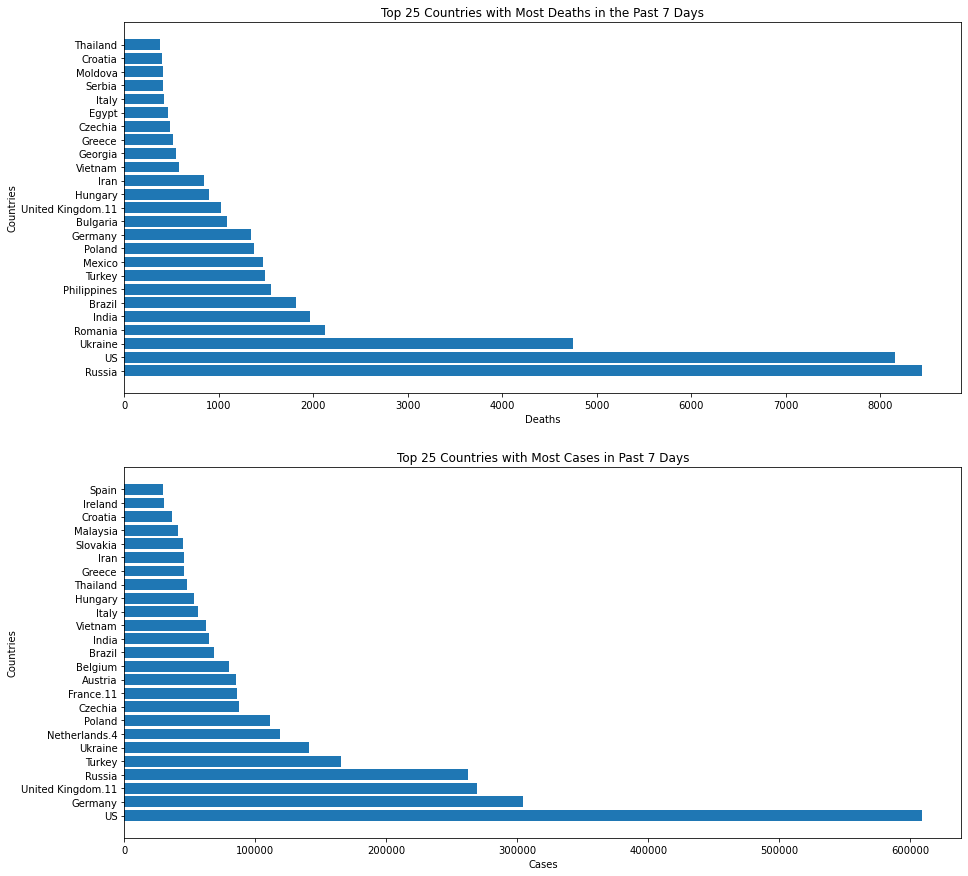

In [231]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (15,15))
fig_df1 = deaths_df_window.iloc[-1].sort_values(ascending = False)[:25].reset_index()
fig_df1 = fig_df1.rename(columns = {fig_df1.columns[0]:'Country',fig_df1.columns[1]:'values'})

fig_df2 = cases_df_window.iloc[-1].sort_values(ascending = False)[:25].reset_index()
fig_df2 = fig_df2.rename(columns = {fig_df2 .columns[0]:'Country',fig_df2 .columns[1]:'values'})

display(fig_df1.head())
display(fig_df2.head())

axes[0].barh(fig_df1['Country'],fig_df1['values'])
axes[0].set_title("Top 25 Countries with Most Deaths in the Past 7 Days")
axes[0].set_xlabel("Deaths")
axes[0].set_ylabel("Countries")

axes[1].barh(fig_df2['Country'],fig_df2['values'])
axes[1].set_xlabel("Cases")
axes[1].set_title("Top 25 Countries with Most Cases in Past 7 Days")
axes[1].set_ylabel("Countries")

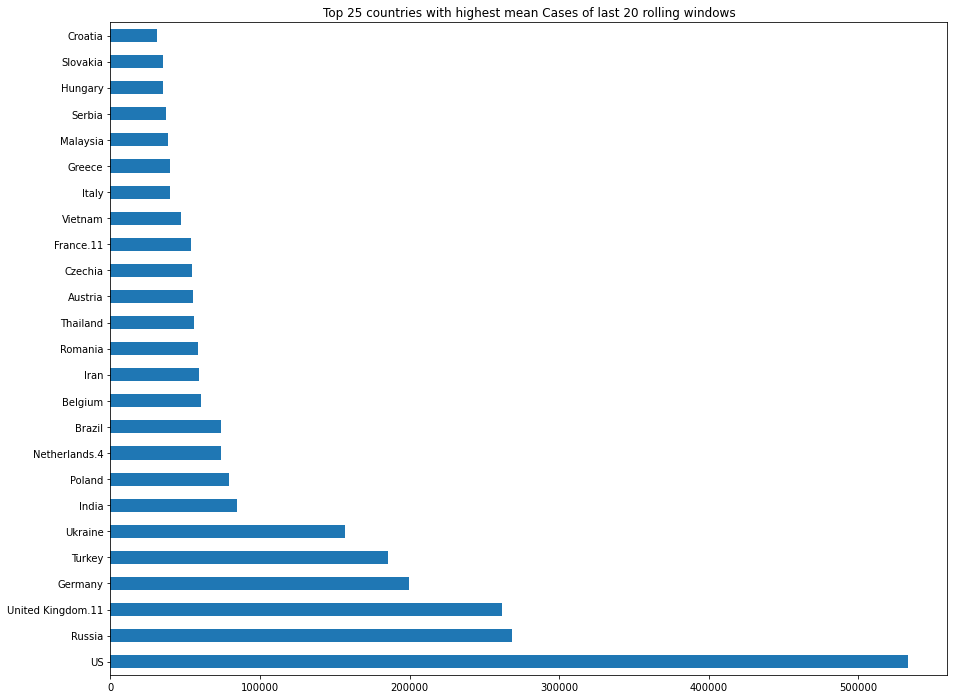

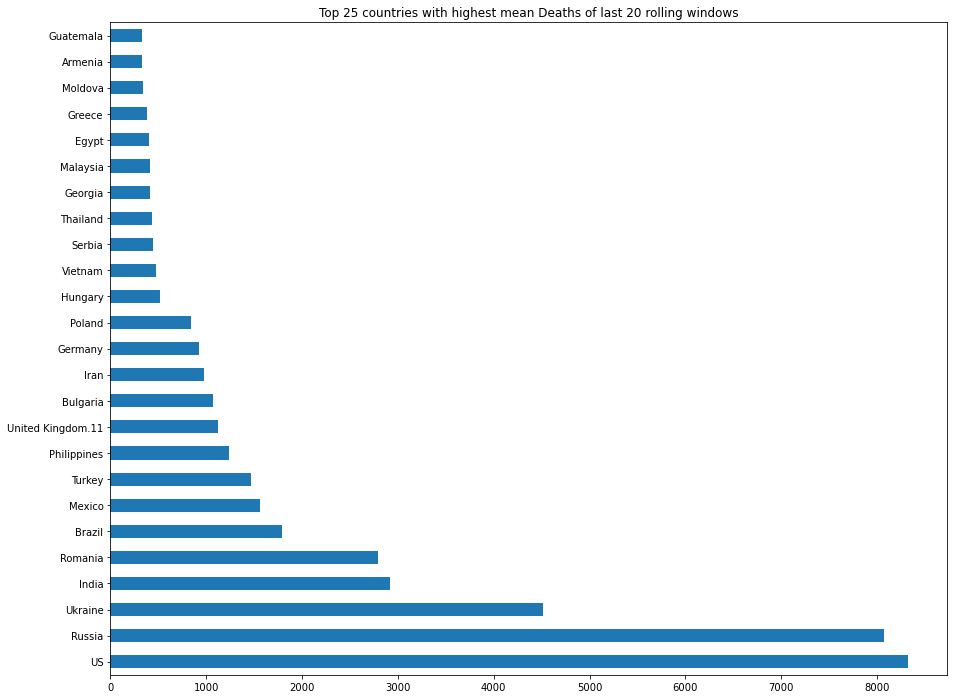

In [232]:

cases_df_window[-20:].mean().sort_values(ascending = False)[:25].plot(kind = 'barh',figsize=(15,12),title = 'Top 25 countries with highest mean Cases of last 20 rolling windows')
plt.show()

plt.figure(figsize=(20,20))
deaths_df_window[-20:].mean().sort_values(ascending = False)[:25].plot(kind = 'barh',figsize=(15,12),title = 'Top 25 countries with highest mean Deaths of last 20 rolling windows')
plt.show()